# Mount my drive:

In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2')
!ls

config.py   distributions  README.md	     trained_models
data	    experiments    requirements.txt  utils
DataLoader  __pycache__    results	     visualize


# Import:

In [0]:
!pip install pytorch-ignite

     |████████████████████████████████| 112kB 2.9MB/s 


In [0]:
try:
  from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
  from ignite.metrics import Accuracy, Loss, ConfusionMatrix
  from ignite.handlers import ModelCheckpoint
except ImportError:
  raise RuntimeError("no module Ignite, to install Ignite: 'pip install pytorch-ignite'.")

from tqdm import tqdm

In [0]:
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

from utils.models import get_my_model_MNIST, fetch_last_checkpoint_model_filename
from DataLoader.dataLoaders import get_mnist_dataloaders
# from utils.training import run, evaluate
from utils.functions import Hardsigmoid

# Dataset:

In [0]:
batch_size_train = 10000
batch_size_test = 1000
# Dataset
train_loader, valid_loader, test_loader, classes = get_mnist_dataloaders(batch_size_train, batch_size_test)

Number of validation examples: 6000
Number of training examples: 6
Number of testing examples: 10


# Training:

## Training parameters:

In [0]:
epochs = 50
lr = 1e-3
momentum = 0.5
log_interval = 10  # how many batches to wait before logging training status
criterion =  F.nll_loss

## Run No binary network:

In [0]:
# parameters model to load no Binary model
binary = False

model, name_model = get_my_model_MNIST(binary)
print(name_model)

MNIST_NonBinaryNet


ITERATION - loss: 1.12: 100%|█████████▉| 840/844 [00:25<00:00, 58.62it/s]

Training Results - Epoch: 1  Avg accuracy: 81.21 Avg loss: 1.08


ITERATION - loss: 1.17:   1%|          | 10/844 [00:26<05:36,  2.48it/s] 

Validation Results - Epoch: 1  Avg accuracy: 81.05 Avg loss: 1.09


ITERATION - loss: 0.73: 100%|█████████▉| 840/844 [00:52<00:00, 63.27it/s]

Training Results - Epoch: 2  Avg accuracy: 84.83 Avg loss: 0.73


ITERATION - loss: 0.68:   1%|          | 10/844 [00:53<05:36,  2.48it/s] 

Validation Results - Epoch: 2  Avg accuracy: 84.53 Avg loss: 0.73


ITERATION - loss: 0.54: 850it [01:19, 65.68it/s]

Training Results - Epoch: 3  Avg accuracy: 86.79 Avg loss: 0.59


ITERATION - loss: 0.56:   1%|          | 10/844 [01:20<05:40,  2.45it/s]

Validation Results - Epoch: 3  Avg accuracy: 86.63 Avg loss: 0.60


ITERATION - loss: 0.51: 100%|█████████▉| 840/844 [01:45<00:00, 59.66it/s]

Training Results - Epoch: 4  Avg accuracy: 87.83 Avg loss: 0.52


ITERATION - loss: 0.59:   1%|          | 10/844 [01:47<05:36,  2.48it/s] 

Validation Results - Epoch: 4  Avg accuracy: 87.65 Avg loss: 0.52


ITERATION - loss: 0.47: 850it [02:12, 61.38it/s]

Training Results - Epoch: 5  Avg accuracy: 88.77 Avg loss: 0.47


ITERATION - loss: 0.49:   1%|          | 10/844 [02:13<05:40,  2.45it/s]

Validation Results - Epoch: 5  Avg accuracy: 88.62 Avg loss: 0.47


ITERATION - loss: 0.32: 100%|█████████▉| 840/844 [02:39<00:00, 65.07it/s]

Training Results - Epoch: 6  Avg accuracy: 89.31 Avg loss: 0.43


ITERATION - loss: 0.50:   1%|          | 10/844 [02:40<05:43,  2.43it/s] 

Validation Results - Epoch: 6  Avg accuracy: 89.27 Avg loss: 0.44


ITERATION - loss: 0.38: 100%|█████████▉| 840/844 [03:06<00:00, 59.44it/s]

Training Results - Epoch: 7  Avg accuracy: 89.78 Avg loss: 0.41


ITERATION - loss: 0.32:   1%|          | 10/844 [03:07<05:39,  2.46it/s] 

Validation Results - Epoch: 7  Avg accuracy: 89.75 Avg loss: 0.41


ITERATION - loss: 0.39: 850it [03:33, 62.29it/s]

Training Results - Epoch: 8  Avg accuracy: 90.15 Avg loss: 0.38


ITERATION - loss: 0.40:   1%|          | 10/844 [03:34<05:35,  2.48it/s]

Validation Results - Epoch: 8  Avg accuracy: 90.05 Avg loss: 0.39


ITERATION - loss: 0.34: 100%|█████████▉| 840/844 [04:00<00:00, 59.53it/s]

Training Results - Epoch: 9  Avg accuracy: 90.46 Avg loss: 0.36


ITERATION - loss: 0.27:   1%|          | 10/844 [04:01<05:35,  2.49it/s] 

Validation Results - Epoch: 9  Avg accuracy: 90.42 Avg loss: 0.37


ITERATION - loss: 0.16: 850it [04:27, 61.31it/s]

Training Results - Epoch: 10  Avg accuracy: 90.86 Avg loss: 0.35


ITERATION - loss: 0.36:   1%|          | 10/844 [04:28<05:43,  2.43it/s]

Validation Results - Epoch: 10  Avg accuracy: 90.88 Avg loss: 0.35


ITERATION - loss: 0.32: 100%|█████████▉| 840/844 [04:54<00:00, 58.79it/s]

Training Results - Epoch: 11  Avg accuracy: 91.26 Avg loss: 0.33


ITERATION - loss: 0.42:   1%|          | 10/844 [04:55<05:42,  2.44it/s] 

Validation Results - Epoch: 11  Avg accuracy: 91.42 Avg loss: 0.34


ITERATION - loss: 0.39: 100%|█████████▉| 840/844 [05:20<00:00, 61.76it/s]

Training Results - Epoch: 12  Avg accuracy: 91.56 Avg loss: 0.32


ITERATION - loss: 0.28:   1%|          | 10/844 [05:22<05:45,  2.42it/s] 

Validation Results - Epoch: 12  Avg accuracy: 91.73 Avg loss: 0.33


ITERATION - loss: 0.30: 850it [05:47, 61.91it/s]

Training Results - Epoch: 13  Avg accuracy: 91.93 Avg loss: 0.31


ITERATION - loss: 0.55:   1%|          | 10/844 [05:49<05:39,  2.45it/s]

Validation Results - Epoch: 13  Avg accuracy: 91.92 Avg loss: 0.31


ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [06:14<00:00, 61.93it/s]

Training Results - Epoch: 14  Avg accuracy: 92.15 Avg loss: 0.30


ITERATION - loss: 0.23:   1%|          | 10/844 [06:16<05:44,  2.42it/s] 

Validation Results - Epoch: 14  Avg accuracy: 92.15 Avg loss: 0.30


ITERATION - loss: 0.20: 850it [06:42, 61.08it/s]

Training Results - Epoch: 15  Avg accuracy: 92.50 Avg loss: 0.29


ITERATION - loss: 0.30:   1%|          | 10/844 [06:43<05:45,  2.42it/s]

Validation Results - Epoch: 15  Avg accuracy: 92.37 Avg loss: 0.29


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [07:09<00:00, 59.50it/s]

Training Results - Epoch: 16  Avg accuracy: 92.67 Avg loss: 0.28


ITERATION - loss: 0.18:   1%|          | 10/844 [07:10<05:39,  2.46it/s] 

Validation Results - Epoch: 16  Avg accuracy: 92.60 Avg loss: 0.28


ITERATION - loss: 0.21: 100%|█████████▉| 840/844 [07:36<00:00, 61.41it/s]

Training Results - Epoch: 17  Avg accuracy: 92.94 Avg loss: 0.27


ITERATION - loss: 0.24:   1%|          | 10/844 [07:37<05:38,  2.46it/s] 

Validation Results - Epoch: 17  Avg accuracy: 92.68 Avg loss: 0.27


ITERATION - loss: 0.25: 850it [08:03, 62.41it/s]

Training Results - Epoch: 18  Avg accuracy: 93.22 Avg loss: 0.26


ITERATION - loss: 0.15:   1%|          | 10/844 [08:04<05:39,  2.46it/s]

Validation Results - Epoch: 18  Avg accuracy: 93.00 Avg loss: 0.27


ITERATION - loss: 0.24: 100%|█████████▉| 840/844 [08:31<00:00, 58.97it/s]

Training Results - Epoch: 19  Avg accuracy: 93.40 Avg loss: 0.25


ITERATION - loss: 0.33:   1%|          | 10/844 [08:32<05:46,  2.41it/s] 

Validation Results - Epoch: 19  Avg accuracy: 93.05 Avg loss: 0.26


ITERATION - loss: 0.16: 850it [08:58, 62.86it/s]

Training Results - Epoch: 20  Avg accuracy: 93.61 Avg loss: 0.24


ITERATION - loss: 0.16: 850it [08:59, 62.86it/s]

Validation Results - Epoch: 20  Avg accuracy: 93.32 Avg loss: 0.25


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [09:25<00:00, 55.88it/s]

Training Results - Epoch: 21  Avg accuracy: 93.79 Avg loss: 0.24


ITERATION - loss: 0.21:   1%|          | 10/844 [09:26<05:40,  2.45it/s] 

Validation Results - Epoch: 21  Avg accuracy: 93.48 Avg loss: 0.24


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [09:52<00:00, 63.17it/s]

Training Results - Epoch: 22  Avg accuracy: 94.00 Avg loss: 0.23


ITERATION - loss: 0.26:   1%|          | 10/844 [09:53<05:42,  2.43it/s] 

Validation Results - Epoch: 22  Avg accuracy: 93.77 Avg loss: 0.23


ITERATION - loss: 0.12: 850it [10:19, 61.96it/s]

Training Results - Epoch: 23  Avg accuracy: 94.16 Avg loss: 0.22


ITERATION - loss: 0.22:   1%|          | 10/844 [10:21<05:48,  2.39it/s]

Validation Results - Epoch: 23  Avg accuracy: 93.77 Avg loss: 0.23


ITERATION - loss: 0.21: 100%|█████████▉| 840/844 [10:46<00:00, 58.32it/s]

Training Results - Epoch: 24  Avg accuracy: 94.31 Avg loss: 0.22


ITERATION - loss: 0.21:   1%|          | 10/844 [10:48<05:42,  2.44it/s] 

Validation Results - Epoch: 24  Avg accuracy: 93.95 Avg loss: 0.22


ITERATION - loss: 0.27: 850it [11:13, 64.06it/s]

Training Results - Epoch: 25  Avg accuracy: 94.45 Avg loss: 0.21


ITERATION - loss: 0.27: 850it [11:14, 64.06it/s]

Validation Results - Epoch: 25  Avg accuracy: 94.03 Avg loss: 0.22


ITERATION - loss: 0.17: 100%|█████████▉| 840/844 [11:40<00:00, 57.77it/s]

Training Results - Epoch: 26  Avg accuracy: 94.61 Avg loss: 0.20


ITERATION - loss: 0.18:   1%|          | 10/844 [11:42<05:40,  2.45it/s] 

Validation Results - Epoch: 26  Avg accuracy: 94.38 Avg loss: 0.21


ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [12:07<00:00, 62.42it/s]

Training Results - Epoch: 27  Avg accuracy: 94.78 Avg loss: 0.20


ITERATION - loss: 0.16:   1%|          | 10/844 [12:09<05:38,  2.46it/s] 

Validation Results - Epoch: 27  Avg accuracy: 94.58 Avg loss: 0.21


ITERATION - loss: 0.14: 850it [12:34, 62.75it/s]

Training Results - Epoch: 28  Avg accuracy: 94.91 Avg loss: 0.19


ITERATION - loss: 0.16:   1%|          | 10/844 [12:36<05:41,  2.44it/s]

Validation Results - Epoch: 28  Avg accuracy: 94.68 Avg loss: 0.20


ITERATION - loss: 0.19: 100%|█████████▉| 840/844 [13:02<00:00, 59.28it/s]

Training Results - Epoch: 29  Avg accuracy: 95.03 Avg loss: 0.19


ITERATION - loss: 0.16:   1%|          | 10/844 [13:03<05:43,  2.43it/s] 

Validation Results - Epoch: 29  Avg accuracy: 94.83 Avg loss: 0.20


ITERATION - loss: 0.27: 850it [13:30, 58.35it/s]

Training Results - Epoch: 30  Avg accuracy: 95.14 Avg loss: 0.19


ITERATION - loss: 0.27: 850it [13:31, 58.35it/s]

Validation Results - Epoch: 30  Avg accuracy: 95.00 Avg loss: 0.19


ITERATION - loss: 0.34: 100%|█████████▉| 840/844 [13:57<00:00, 60.20it/s]

Training Results - Epoch: 31  Avg accuracy: 95.23 Avg loss: 0.18


ITERATION - loss: 0.14:   1%|          | 10/844 [13:59<05:47,  2.40it/s] 

Validation Results - Epoch: 31  Avg accuracy: 95.10 Avg loss: 0.19


ITERATION - loss: 0.21: 100%|█████████▉| 840/844 [14:25<00:00, 61.10it/s]

Training Results - Epoch: 32  Avg accuracy: 95.32 Avg loss: 0.18


ITERATION - loss: 0.10:   1%|          | 10/844 [14:26<05:44,  2.42it/s] 

Validation Results - Epoch: 32  Avg accuracy: 95.17 Avg loss: 0.18


ITERATION - loss: 0.06: 850it [14:52, 59.31it/s]

Training Results - Epoch: 33  Avg accuracy: 95.39 Avg loss: 0.17


ITERATION - loss: 0.14:   1%|          | 10/844 [14:53<05:41,  2.44it/s]

Validation Results - Epoch: 33  Avg accuracy: 95.28 Avg loss: 0.18


ITERATION - loss: 0.28: 100%|█████████▉| 840/844 [15:19<00:00, 57.33it/s]

Training Results - Epoch: 34  Avg accuracy: 95.43 Avg loss: 0.17


ITERATION - loss: 0.16:   1%|          | 10/844 [15:21<05:51,  2.37it/s] 

Validation Results - Epoch: 34  Avg accuracy: 95.28 Avg loss: 0.18


ITERATION - loss: 0.21: 850it [15:47, 59.78it/s]

Training Results - Epoch: 35  Avg accuracy: 95.52 Avg loss: 0.17


ITERATION - loss: 0.21:   1%|          | 10/844 [15:48<05:47,  2.40it/s]

Validation Results - Epoch: 35  Avg accuracy: 95.33 Avg loss: 0.17


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [16:14<00:00, 59.20it/s]

Training Results - Epoch: 36  Avg accuracy: 95.66 Avg loss: 0.16


ITERATION - loss: 0.31:   1%|          | 10/844 [16:15<05:40,  2.45it/s] 

Validation Results - Epoch: 36  Avg accuracy: 95.42 Avg loss: 0.17


ITERATION - loss: 0.22: 100%|█████████▉| 840/844 [16:42<00:00, 56.68it/s]

Training Results - Epoch: 37  Avg accuracy: 95.66 Avg loss: 0.16


ITERATION - loss: 0.25:   1%|          | 10/844 [16:43<05:48,  2.39it/s] 

Validation Results - Epoch: 37  Avg accuracy: 95.50 Avg loss: 0.17


ITERATION - loss: 0.16: 850it [17:09, 60.19it/s]

Training Results - Epoch: 38  Avg accuracy: 95.80 Avg loss: 0.16


ITERATION - loss: 0.17:   1%|          | 10/844 [17:11<05:50,  2.38it/s]

Validation Results - Epoch: 38  Avg accuracy: 95.45 Avg loss: 0.17


ITERATION - loss: 0.13: 100%|█████████▉| 840/844 [17:37<00:00, 54.91it/s]

Training Results - Epoch: 39  Avg accuracy: 95.87 Avg loss: 0.16


ITERATION - loss: 0.12:   1%|          | 10/844 [17:39<05:49,  2.39it/s] 

Validation Results - Epoch: 39  Avg accuracy: 95.60 Avg loss: 0.16


ITERATION - loss: 0.31: 850it [18:05, 59.42it/s]

Training Results - Epoch: 40  Avg accuracy: 95.95 Avg loss: 0.15


ITERATION - loss: 0.15:   1%|          | 10/844 [18:07<05:50,  2.38it/s]

Validation Results - Epoch: 40  Avg accuracy: 95.60 Avg loss: 0.16


ITERATION - loss: 0.18: 100%|█████████▉| 840/844 [18:34<00:00, 58.45it/s]

Training Results - Epoch: 41  Avg accuracy: 96.04 Avg loss: 0.15


ITERATION - loss: 0.10:   1%|          | 10/844 [18:35<05:51,  2.37it/s] 

Validation Results - Epoch: 41  Avg accuracy: 95.55 Avg loss: 0.16


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [19:02<00:00, 58.11it/s]

Training Results - Epoch: 42  Avg accuracy: 96.02 Avg loss: 0.15


ITERATION - loss: 0.11:   1%|          | 10/844 [19:03<05:51,  2.37it/s] 

Validation Results - Epoch: 42  Avg accuracy: 95.80 Avg loss: 0.16


ITERATION - loss: 0.18: 850it [19:30, 55.01it/s]

Training Results - Epoch: 43  Avg accuracy: 96.13 Avg loss: 0.15


ITERATION - loss: 0.10:   1%|          | 10/844 [19:31<05:47,  2.40it/s]

Validation Results - Epoch: 43  Avg accuracy: 95.75 Avg loss: 0.15


ITERATION - loss: 0.08: 100%|█████████▉| 840/844 [19:58<00:00, 60.30it/s]

Training Results - Epoch: 44  Avg accuracy: 96.17 Avg loss: 0.14


ITERATION - loss: 0.09:   1%|          | 10/844 [19:59<05:53,  2.36it/s] 

Validation Results - Epoch: 44  Avg accuracy: 95.83 Avg loss: 0.15


ITERATION - loss: 0.16: 850it [20:25, 59.51it/s]

Training Results - Epoch: 45  Avg accuracy: 96.23 Avg loss: 0.14


ITERATION - loss: 0.16: 850it [20:27, 59.51it/s]

Validation Results - Epoch: 45  Avg accuracy: 95.87 Avg loss: 0.15


ITERATION - loss: 0.09: 100%|█████████▉| 840/844 [20:53<00:00, 58.23it/s]

Training Results - Epoch: 46  Avg accuracy: 96.28 Avg loss: 0.14


ITERATION - loss: 0.12:   1%|          | 10/844 [20:55<05:48,  2.39it/s] 

Validation Results - Epoch: 46  Avg accuracy: 95.87 Avg loss: 0.15


ITERATION - loss: 0.11: 100%|█████████▉| 840/844 [21:21<00:00, 60.70it/s]

Training Results - Epoch: 47  Avg accuracy: 96.34 Avg loss: 0.14


ITERATION - loss: 0.14:   1%|          | 10/844 [21:22<05:51,  2.37it/s] 

Validation Results - Epoch: 47  Avg accuracy: 95.97 Avg loss: 0.15


ITERATION - loss: 0.08: 850it [21:49, 60.07it/s]

Training Results - Epoch: 48  Avg accuracy: 96.39 Avg loss: 0.14


ITERATION - loss: 0.14:   1%|          | 10/844 [21:50<05:49,  2.39it/s]

Validation Results - Epoch: 48  Avg accuracy: 96.00 Avg loss: 0.14


ITERATION - loss: 0.15: 100%|█████████▉| 840/844 [22:17<00:00, 57.40it/s]

Training Results - Epoch: 49  Avg accuracy: 96.44 Avg loss: 0.14


ITERATION - loss: 0.05:   1%|          | 10/844 [22:18<05:54,  2.35it/s] 

Validation Results - Epoch: 49  Avg accuracy: 96.03 Avg loss: 0.14


ITERATION - loss: 0.05: 850it [22:44, 59.09it/s]

Training Results - Epoch: 50  Avg accuracy: 96.50 Avg loss: 0.13


ITERATION - loss: 0.05: 850it [22:46, 59.09it/s]

Validation Results - Epoch: 50  Avg accuracy: 96.07 Avg loss: 0.14


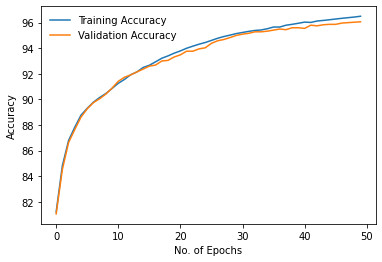

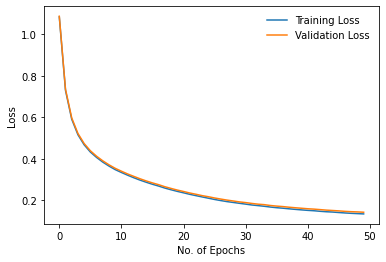

In [0]:
path_model_checkpoint = 'trained_models/MNIST/No_binary_models/'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test no binary network:

In [0]:
# load model pre trained
path_model = 'trained_models/MNIST/No_binary_models/'
model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
print("Model Loaded")

Model Loaded


In [0]:
evaluate(model, test_loader)

Test Results - Avg accuracy: 96.58 Avg loss: 0.13


## Run Binary Netwwork:

In [0]:
# parameters model to load no Binary model
binary = True

model, name_model = get_my_model_MNIST(binary)
print(name_model)

MNIST_Stochastic_ST_first_conv_binary


ITERATION - loss: 1.49: 100%|█████████▉| 840/844 [00:26<00:00, 60.49it/s]

Training Results - Epoch: 1  Avg accuracy: 73.98 Avg loss: 1.45


ITERATION - loss: 1.51:   1%|          | 10/844 [00:27<05:47,  2.40it/s] 

Validation Results - Epoch: 1  Avg accuracy: 74.00 Avg loss: 1.45


ITERATION - loss: 0.98: 100%|█████████▉| 840/844 [00:54<00:00, 61.10it/s]

Training Results - Epoch: 2  Avg accuracy: 80.60 Avg loss: 0.95


ITERATION - loss: 0.85:   1%|          | 10/844 [00:55<05:49,  2.39it/s] 

Validation Results - Epoch: 2  Avg accuracy: 80.30 Avg loss: 0.95


ITERATION - loss: 0.71: 850it [01:22, 59.94it/s]

Training Results - Epoch: 3  Avg accuracy: 83.31 Avg loss: 0.75


ITERATION - loss: 0.70:   1%|          | 10/844 [01:23<05:47,  2.40it/s]

Validation Results - Epoch: 3  Avg accuracy: 83.12 Avg loss: 0.75


ITERATION - loss: 0.60: 100%|█████████▉| 840/844 [01:50<00:00, 57.01it/s]

Training Results - Epoch: 4  Avg accuracy: 84.66 Avg loss: 0.64


ITERATION - loss: 0.78:   1%|          | 10/844 [01:51<05:52,  2.36it/s] 

Validation Results - Epoch: 4  Avg accuracy: 84.58 Avg loss: 0.64


ITERATION - loss: 0.55: 850it [02:17, 58.88it/s]

Training Results - Epoch: 5  Avg accuracy: 85.78 Avg loss: 0.58


ITERATION - loss: 0.55: 850it [02:19, 58.88it/s]

Validation Results - Epoch: 5  Avg accuracy: 85.83 Avg loss: 0.58


ITERATION - loss: 0.40: 100%|█████████▉| 840/844 [02:45<00:00, 59.46it/s]

Training Results - Epoch: 6  Avg accuracy: 86.43 Avg loss: 0.53


ITERATION - loss: 0.60:   1%|          | 10/844 [02:47<05:46,  2.41it/s] 

Validation Results - Epoch: 6  Avg accuracy: 86.78 Avg loss: 0.53


ITERATION - loss: 0.48: 100%|█████████▉| 840/844 [03:12<00:00, 58.73it/s]

Training Results - Epoch: 7  Avg accuracy: 87.01 Avg loss: 0.50


ITERATION - loss: 0.45:   1%|          | 10/844 [03:14<05:43,  2.43it/s] 

Validation Results - Epoch: 7  Avg accuracy: 87.35 Avg loss: 0.50


ITERATION - loss: 0.50: 850it [03:40, 60.26it/s]

Training Results - Epoch: 8  Avg accuracy: 87.33 Avg loss: 0.48


ITERATION - loss: 0.51:   1%|          | 10/844 [03:41<05:43,  2.43it/s]

Validation Results - Epoch: 8  Avg accuracy: 87.38 Avg loss: 0.48


ITERATION - loss: 0.41: 100%|█████████▉| 840/844 [04:07<00:00, 62.50it/s]

Training Results - Epoch: 9  Avg accuracy: 87.65 Avg loss: 0.45


ITERATION - loss: 0.37:   1%|          | 10/844 [04:08<05:47,  2.40it/s] 

Validation Results - Epoch: 9  Avg accuracy: 87.65 Avg loss: 0.46


ITERATION - loss: 0.22: 850it [04:34, 60.32it/s]

Training Results - Epoch: 10  Avg accuracy: 87.95 Avg loss: 0.44


ITERATION - loss: 0.45:   1%|          | 10/844 [04:36<05:47,  2.40it/s]

Validation Results - Epoch: 10  Avg accuracy: 87.80 Avg loss: 0.44


ITERATION - loss: 0.41: 100%|█████████▉| 840/844 [05:02<00:00, 59.97it/s]

Training Results - Epoch: 11  Avg accuracy: 88.28 Avg loss: 0.42


ITERATION - loss: 0.52:   1%|          | 10/844 [05:03<05:45,  2.41it/s] 

Validation Results - Epoch: 11  Avg accuracy: 88.32 Avg loss: 0.43


ITERATION - loss: 0.47: 100%|█████████▉| 840/844 [05:29<00:00, 62.61it/s]

Training Results - Epoch: 12  Avg accuracy: 88.55 Avg loss: 0.41


ITERATION - loss: 0.34:   1%|          | 10/844 [05:30<05:53,  2.36it/s] 

Validation Results - Epoch: 12  Avg accuracy: 88.53 Avg loss: 0.41


ITERATION - loss: 0.41: 850it [05:56, 63.37it/s]

Training Results - Epoch: 13  Avg accuracy: 88.77 Avg loss: 0.40


ITERATION - loss: 0.61:   1%|          | 10/844 [05:58<05:43,  2.43it/s]

Validation Results - Epoch: 13  Avg accuracy: 88.72 Avg loss: 0.41


ITERATION - loss: 0.26: 100%|█████████▉| 840/844 [06:23<00:00, 60.68it/s]

Training Results - Epoch: 14  Avg accuracy: 88.89 Avg loss: 0.39


ITERATION - loss: 0.32:   1%|          | 10/844 [06:25<05:40,  2.45it/s] 

Validation Results - Epoch: 14  Avg accuracy: 88.63 Avg loss: 0.40


ITERATION - loss: 0.32: 850it [06:50, 59.65it/s]

Training Results - Epoch: 15  Avg accuracy: 89.16 Avg loss: 0.38


ITERATION - loss: 0.46:   1%|          | 10/844 [06:52<05:36,  2.48it/s]

Validation Results - Epoch: 15  Avg accuracy: 89.12 Avg loss: 0.39


ITERATION - loss: 0.35: 100%|█████████▉| 840/844 [07:17<00:00, 60.28it/s]

Training Results - Epoch: 16  Avg accuracy: 89.32 Avg loss: 0.38


ITERATION - loss: 0.20:   1%|          | 10/844 [07:19<05:41,  2.44it/s] 

Validation Results - Epoch: 16  Avg accuracy: 89.15 Avg loss: 0.38


ITERATION - loss: 0.27: 100%|█████████▉| 840/844 [07:44<00:00, 62.47it/s]

Training Results - Epoch: 17  Avg accuracy: 89.47 Avg loss: 0.37


ITERATION - loss: 0.31:   1%|          | 10/844 [07:46<05:38,  2.47it/s] 

Validation Results - Epoch: 17  Avg accuracy: 89.52 Avg loss: 0.37


ITERATION - loss: 0.35: 850it [08:11, 61.66it/s]

Training Results - Epoch: 18  Avg accuracy: 89.69 Avg loss: 0.36


ITERATION - loss: 0.25:   1%|          | 10/844 [08:13<05:42,  2.44it/s]

Validation Results - Epoch: 18  Avg accuracy: 89.62 Avg loss: 0.37


ITERATION - loss: 0.32: 100%|█████████▉| 840/844 [08:38<00:00, 61.78it/s]

Training Results - Epoch: 19  Avg accuracy: 89.77 Avg loss: 0.36


ITERATION - loss: 0.46:   1%|          | 10/844 [08:40<05:43,  2.43it/s]

Validation Results - Epoch: 19  Avg accuracy: 89.55 Avg loss: 0.36


ITERATION - loss: 0.29: 850it [09:05, 62.30it/s]

Training Results - Epoch: 20  Avg accuracy: 89.89 Avg loss: 0.35


ITERATION - loss: 0.29:   1%|          | 10/844 [09:07<05:37,  2.47it/s]

Validation Results - Epoch: 20  Avg accuracy: 89.95 Avg loss: 0.36


ITERATION - loss: 0.39: 100%|█████████▉| 840/844 [09:32<00:00, 61.30it/s]

Training Results - Epoch: 21  Avg accuracy: 90.01 Avg loss: 0.35


ITERATION - loss: 0.27:   1%|          | 10/844 [09:33<05:41,  2.44it/s] 

Validation Results - Epoch: 21  Avg accuracy: 89.82 Avg loss: 0.35


ITERATION - loss: 0.34: 100%|█████████▉| 840/844 [09:58<00:00, 61.46it/s]

Training Results - Epoch: 22  Avg accuracy: 90.15 Avg loss: 0.34


ITERATION - loss: 0.37:   1%|          | 10/844 [10:00<05:36,  2.48it/s]

Validation Results - Epoch: 22  Avg accuracy: 89.93 Avg loss: 0.35


ITERATION - loss: 0.24: 850it [10:25, 61.35it/s]

Training Results - Epoch: 23  Avg accuracy: 90.21 Avg loss: 0.34


ITERATION - loss: 0.44:   1%|          | 10/844 [10:26<05:36,  2.48it/s]

Validation Results - Epoch: 23  Avg accuracy: 90.15 Avg loss: 0.34


ITERATION - loss: 0.34: 100%|█████████▉| 840/844 [10:51<00:00, 60.88it/s]

Training Results - Epoch: 24  Avg accuracy: 90.33 Avg loss: 0.34


ITERATION - loss: 0.33:   1%|          | 10/844 [10:53<05:35,  2.49it/s] 

Validation Results - Epoch: 24  Avg accuracy: 90.12 Avg loss: 0.34


ITERATION - loss: 0.40: 850it [11:18, 64.43it/s]

Training Results - Epoch: 25  Avg accuracy: 90.42 Avg loss: 0.33


ITERATION - loss: 0.33:   1%|          | 10/844 [11:19<05:38,  2.47it/s]

Validation Results - Epoch: 25  Avg accuracy: 90.33 Avg loss: 0.34


ITERATION - loss: 0.24: 100%|█████████▉| 840/844 [11:44<00:00, 63.96it/s]

Training Results - Epoch: 26  Avg accuracy: 90.45 Avg loss: 0.33


ITERATION - loss: 0.31:   1%|          | 10/844 [11:46<05:31,  2.51it/s] 

Validation Results - Epoch: 26  Avg accuracy: 90.35 Avg loss: 0.33


ITERATION - loss: 0.35: 100%|█████████▉| 840/844 [12:11<00:00, 62.70it/s]

Training Results - Epoch: 27  Avg accuracy: 90.56 Avg loss: 0.33


ITERATION - loss: 0.29:   1%|          | 10/844 [12:12<05:29,  2.53it/s] 

Validation Results - Epoch: 27  Avg accuracy: 90.62 Avg loss: 0.33


ITERATION - loss: 0.26: 850it [12:37, 60.72it/s]

Training Results - Epoch: 28  Avg accuracy: 90.65 Avg loss: 0.32


ITERATION - loss: 0.27:   1%|          | 10/844 [12:39<05:34,  2.49it/s]

Validation Results - Epoch: 28  Avg accuracy: 90.72 Avg loss: 0.32


ITERATION - loss: 0.29: 100%|█████████▉| 840/844 [13:04<00:00, 61.74it/s]

Training Results - Epoch: 29  Avg accuracy: 90.77 Avg loss: 0.32


ITERATION - loss: 0.29:   1%|          | 10/844 [13:05<05:35,  2.49it/s] 

Validation Results - Epoch: 29  Avg accuracy: 90.82 Avg loss: 0.32


ITERATION - loss: 0.40: 850it [13:30, 62.01it/s]

Training Results - Epoch: 30  Avg accuracy: 90.85 Avg loss: 0.32


ITERATION - loss: 0.40: 850it [13:31, 62.01it/s]

Validation Results - Epoch: 30  Avg accuracy: 90.77 Avg loss: 0.32


ITERATION - loss: 0.52: 100%|█████████▉| 840/844 [13:56<00:00, 63.66it/s]

Training Results - Epoch: 31  Avg accuracy: 91.01 Avg loss: 0.31


ITERATION - loss: 0.29:   1%|          | 10/844 [13:58<05:29,  2.53it/s] 

Validation Results - Epoch: 31  Avg accuracy: 90.93 Avg loss: 0.31


ITERATION - loss: 0.34: 100%|█████████▉| 840/844 [14:23<00:00, 62.10it/s]

Training Results - Epoch: 32  Avg accuracy: 90.98 Avg loss: 0.31


ITERATION - loss: 0.18:   1%|          | 10/844 [14:24<05:33,  2.50it/s] 

Validation Results - Epoch: 32  Avg accuracy: 91.02 Avg loss: 0.31


ITERATION - loss: 0.15: 850it [14:49, 62.20it/s]

Training Results - Epoch: 33  Avg accuracy: 91.13 Avg loss: 0.31


ITERATION - loss: 0.37:   1%|          | 10/844 [14:51<05:32,  2.51it/s]

Validation Results - Epoch: 33  Avg accuracy: 91.10 Avg loss: 0.31


ITERATION - loss: 0.47: 100%|█████████▉| 840/844 [15:16<00:00, 60.76it/s]

Training Results - Epoch: 34  Avg accuracy: 91.17 Avg loss: 0.30


ITERATION - loss: 0.27:   1%|          | 10/844 [15:17<05:37,  2.47it/s] 

Validation Results - Epoch: 34  Avg accuracy: 91.22 Avg loss: 0.31


ITERATION - loss: 0.43: 850it [15:43, 57.25it/s]

Training Results - Epoch: 35  Avg accuracy: 91.21 Avg loss: 0.30


ITERATION - loss: 0.34:   1%|          | 10/844 [15:44<05:35,  2.48it/s]

Validation Results - Epoch: 35  Avg accuracy: 91.30 Avg loss: 0.30


ITERATION - loss: 0.33: 100%|█████████▉| 840/844 [16:10<00:00, 60.07it/s]

Training Results - Epoch: 36  Avg accuracy: 91.30 Avg loss: 0.30


ITERATION - loss: 0.48:   1%|          | 10/844 [16:11<05:39,  2.45it/s] 

Validation Results - Epoch: 36  Avg accuracy: 91.28 Avg loss: 0.30


ITERATION - loss: 0.34: 100%|█████████▉| 840/844 [16:37<00:00, 62.73it/s]

Training Results - Epoch: 37  Avg accuracy: 91.43 Avg loss: 0.30


ITERATION - loss: 0.40:   1%|          | 10/844 [16:38<05:47,  2.40it/s] 

Validation Results - Epoch: 37  Avg accuracy: 91.28 Avg loss: 0.30


ITERATION - loss: 0.29: 850it [17:03, 63.03it/s]

Training Results - Epoch: 38  Avg accuracy: 91.43 Avg loss: 0.29


ITERATION - loss: 0.29:   1%|          | 10/844 [17:05<05:34,  2.49it/s]

Validation Results - Epoch: 38  Avg accuracy: 91.45 Avg loss: 0.30


ITERATION - loss: 0.24: 100%|█████████▉| 840/844 [17:30<00:00, 59.99it/s]

Training Results - Epoch: 39  Avg accuracy: 91.51 Avg loss: 0.29


ITERATION - loss: 0.30:   1%|          | 10/844 [17:31<05:39,  2.46it/s] 

Validation Results - Epoch: 39  Avg accuracy: 91.37 Avg loss: 0.29


ITERATION - loss: 0.37: 850it [17:57, 63.65it/s]

Training Results - Epoch: 40  Avg accuracy: 91.59 Avg loss: 0.29


ITERATION - loss: 0.33:   1%|          | 10/844 [17:58<05:38,  2.46it/s]

Validation Results - Epoch: 40  Avg accuracy: 91.52 Avg loss: 0.29


ITERATION - loss: 0.32: 100%|█████████▉| 840/844 [18:23<00:00, 63.28it/s]

Training Results - Epoch: 41  Avg accuracy: 91.65 Avg loss: 0.29


ITERATION - loss: 0.20:   1%|          | 10/844 [18:25<05:38,  2.47it/s] 

Validation Results - Epoch: 41  Avg accuracy: 91.48 Avg loss: 0.29


ITERATION - loss: 0.23: 100%|█████████▉| 840/844 [18:50<00:00, 59.85it/s]

Training Results - Epoch: 42  Avg accuracy: 91.72 Avg loss: 0.28


ITERATION - loss: 0.26:   1%|          | 10/844 [18:52<05:40,  2.45it/s] 

Validation Results - Epoch: 42  Avg accuracy: 91.67 Avg loss: 0.29


ITERATION - loss: 0.35: 850it [19:17, 61.66it/s]

Training Results - Epoch: 43  Avg accuracy: 91.70 Avg loss: 0.28


ITERATION - loss: 0.24:   1%|          | 10/844 [19:19<05:37,  2.47it/s]

Validation Results - Epoch: 43  Avg accuracy: 91.68 Avg loss: 0.29


ITERATION - loss: 0.23: 100%|█████████▉| 840/844 [19:44<00:00, 60.04it/s]

Training Results - Epoch: 44  Avg accuracy: 91.86 Avg loss: 0.28


ITERATION - loss: 0.23:   1%|          | 10/844 [19:46<05:38,  2.46it/s] 

Validation Results - Epoch: 44  Avg accuracy: 91.75 Avg loss: 0.28


ITERATION - loss: 0.31: 850it [20:11, 61.83it/s]

Training Results - Epoch: 45  Avg accuracy: 91.95 Avg loss: 0.28


ITERATION - loss: 0.43:   1%|          | 10/844 [20:13<05:35,  2.49it/s]

Validation Results - Epoch: 45  Avg accuracy: 91.88 Avg loss: 0.28


ITERATION - loss: 0.14: 100%|█████████▉| 840/844 [20:38<00:00, 63.57it/s]

Training Results - Epoch: 46  Avg accuracy: 91.92 Avg loss: 0.28


ITERATION - loss: 0.24:   1%|          | 10/844 [20:39<05:41,  2.44it/s] 

Validation Results - Epoch: 46  Avg accuracy: 91.93 Avg loss: 0.28


ITERATION - loss: 0.25: 100%|█████████▉| 840/844 [21:05<00:00, 60.65it/s]

Training Results - Epoch: 47  Avg accuracy: 92.06 Avg loss: 0.27


ITERATION - loss: 0.28:   1%|          | 10/844 [21:06<05:39,  2.46it/s] 

Validation Results - Epoch: 47  Avg accuracy: 91.87 Avg loss: 0.28


ITERATION - loss: 0.16: 850it [21:32, 60.22it/s]

Training Results - Epoch: 48  Avg accuracy: 92.14 Avg loss: 0.27


ITERATION - loss: 0.24:   1%|          | 10/844 [21:34<05:46,  2.41it/s]

Validation Results - Epoch: 48  Avg accuracy: 91.90 Avg loss: 0.28


ITERATION - loss: 0.38: 100%|█████████▉| 840/844 [21:59<00:00, 60.97it/s]

Training Results - Epoch: 49  Avg accuracy: 92.15 Avg loss: 0.27


ITERATION - loss: 0.14:   1%|          | 10/844 [22:01<05:40,  2.45it/s] 

Validation Results - Epoch: 49  Avg accuracy: 92.03 Avg loss: 0.27


ITERATION - loss: 0.15: 850it [22:26, 58.70it/s]

Training Results - Epoch: 50  Avg accuracy: 92.28 Avg loss: 0.27


ITERATION - loss: 0.15: 850it [22:27, 58.70it/s]

Validation Results - Epoch: 50  Avg accuracy: 92.07 Avg loss: 0.27


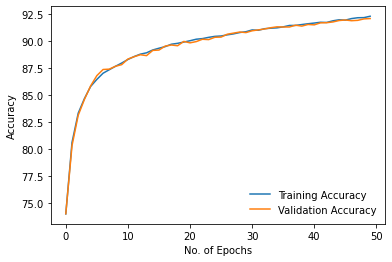

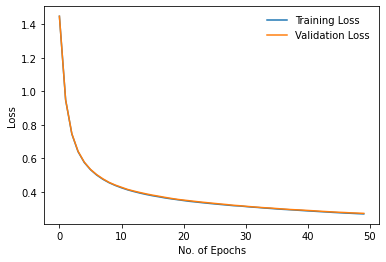

In [0]:
path_model_checkpoint = 'trained_models/MNIST/Binary_models/'
path_save_plot = 'results/MNIST_results/plot_loss_acc/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test Binary network:

In [0]:
# load model pre trained
path_model = 'trained_models/MNIST/Binary_models/'
model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
print("Model Loaded")

Model Loaded


In [0]:
evaluate(model, test_loader)

Test Results - Avg accuracy: 93.02 Avg loss: 0.26


# Visualization:

In [0]:
from visualize.viz import visTensor, get_activation, viz_activations, viz_filters
from visualize.viz import viz_heatmap, test_predict_few_examples, standardize_and_clip, format_for_plotting
from visualize.viz import apply_transforms, GradientAscent, get_filter_layer2
from visualize.viz import get_region_layer1, get_region_layer2, get_regions_interest

# for regions extraction
import collections
from functools import partial
import cv2

## Load model:

In [4]:
# load model pre trained no binary
binary = False
model_no_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/No_binary_models/'
if torch.cuda.is_available():
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_NonBinaryNet


In [5]:
# load model pre trained binary
binary = True    
model_binary, name_model = get_my_model_MNIST(binary)

path_model = 'trained_models/MNIST/Binary_models/'
if torch.cuda.is_available():
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded MNIST_Stochastic_ST_first_conv_binary


In [6]:
print(model_no_binary)

NoBinaryNetMnist(
  (layer1): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): Hardsigmoid(
    (act): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (layer2): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): Hardsigmoid(
    (act): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (fc): Linear(in_features=980, out_features=10, bias=True)
)


In [7]:
print(model_binary)

BinaryNetMNIST(
  (layer1): Conv2d(1, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchnorm2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): Hardsigmoid(
    (act): Hardtanh(min_val=-1.0, max_val=1.0)
  )
  (fc): Linear(in_features=980, out_features=10, bias=True)
)


## Visualization few predictions:

No binary model


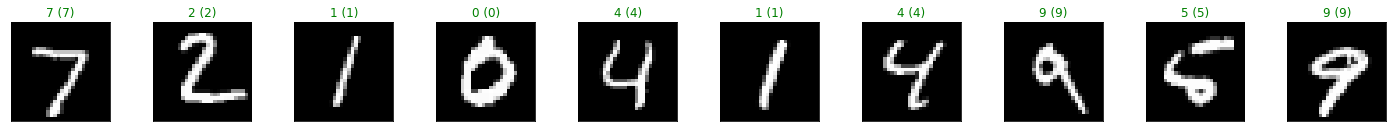

Binary model


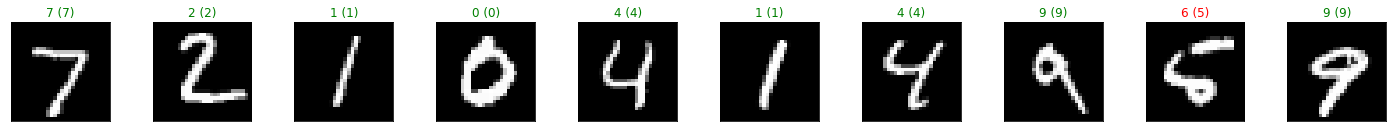

In [0]:
print('No binary model')
test_predict_few_examples(model_no_binary, test_loader)
plt.show()
print('Binary model')
test_predict_few_examples(model_binary, test_loader)
plt.show()

## Visualization Activations values for a specific data:

act_layer1 for label 0


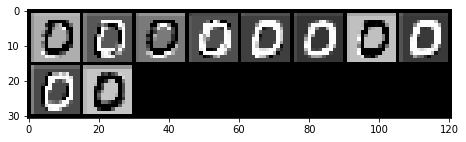

act_layer2 for label 0


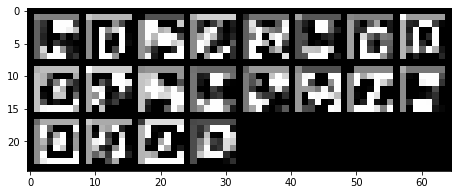

In [0]:
index_data = 10
viz_activations(model_no_binary, test_loader, index_data)

act_layer1.act for label 0


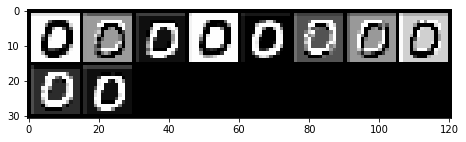

act_layer2 for label 0


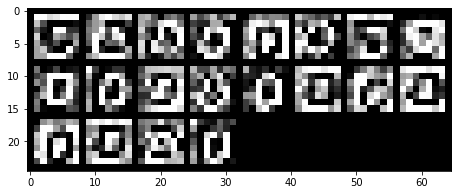

In [0]:
index_data = 10
viz_activations(model_binary, test_loader, index_data)

## Visualization heatmap for a specific data:


layer:act_layer1 :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


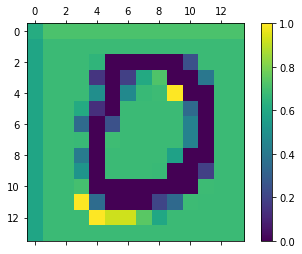

layer:act_layer2 :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


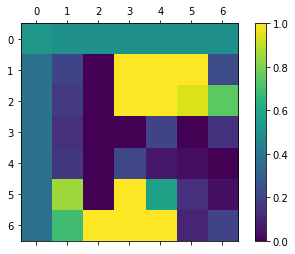

In [0]:
index_data = 10
viz_heatmap(model_no_binary, name_model, test_loader, index_data)

layer:act_layer1.act :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


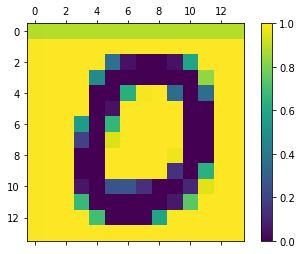

layer:act_layer2 :heatrmap for an image of label 0 with model MNIST_Stochastic_ST_first_conv_binary


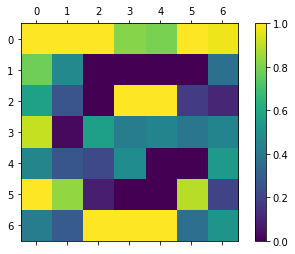

In [0]:
index_data = 10
viz_heatmap(model_binary, name_model, test_loader, index_data)

## Visualization filters trained:

Visualization filters learned for layer: layer1


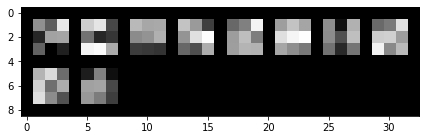

Visualization filters learned for layer: layer2


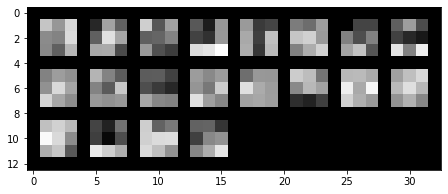

In [0]:
viz_filters(model_no_binary)

Visualization filters learned for layer: layer1


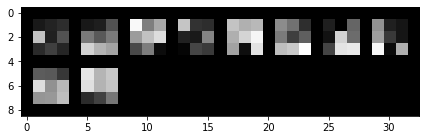

Visualization filters learned for layer: layer2


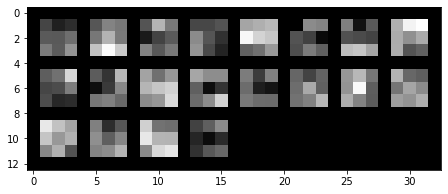

In [0]:
viz_filters(model_binary)

## Visualization image that maximizes a specific activation in a specific layer for a specifc filter:

### No binary model:

In [0]:
g_ascent_no_binary = GradientAscent(model_no_binary, img_size=28)
g_ascent_no_binary.use_gpu = True

In [0]:
conv1_no_binary = model_no_binary.layer1
conv1_filters_no_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7

conv2_no_binary = model_no_binary.layer2
conv2_filters_no_binary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
mean_gradient_layer2 = False
ind_x_layer2 = 3
ind_y_layer2 = 3

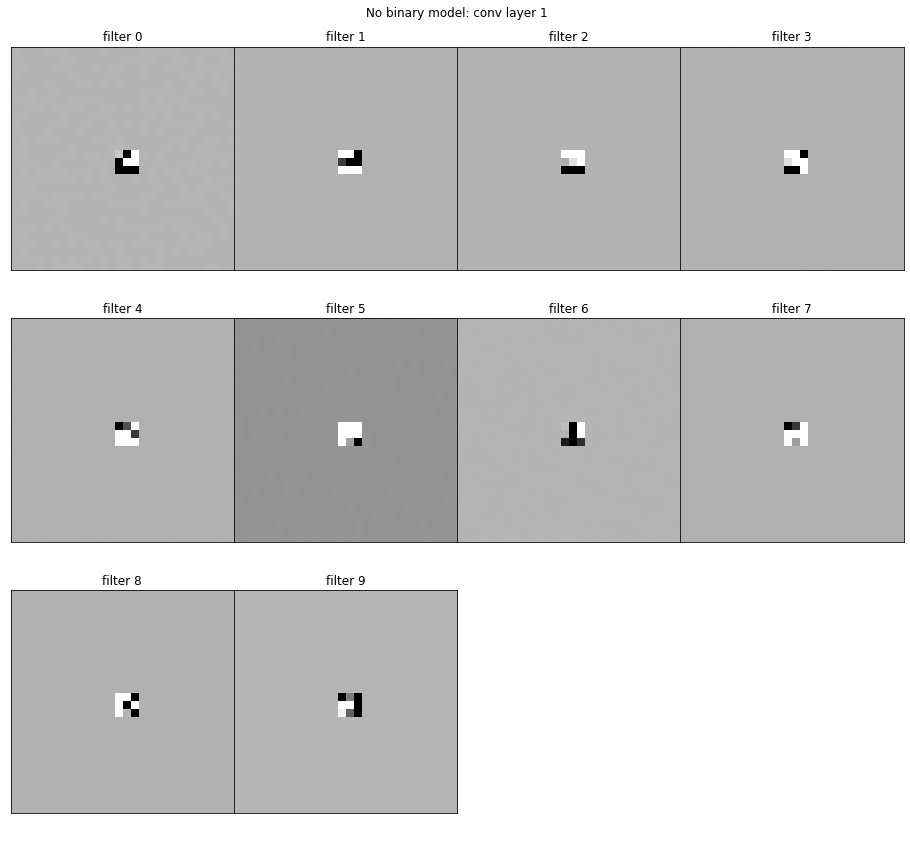

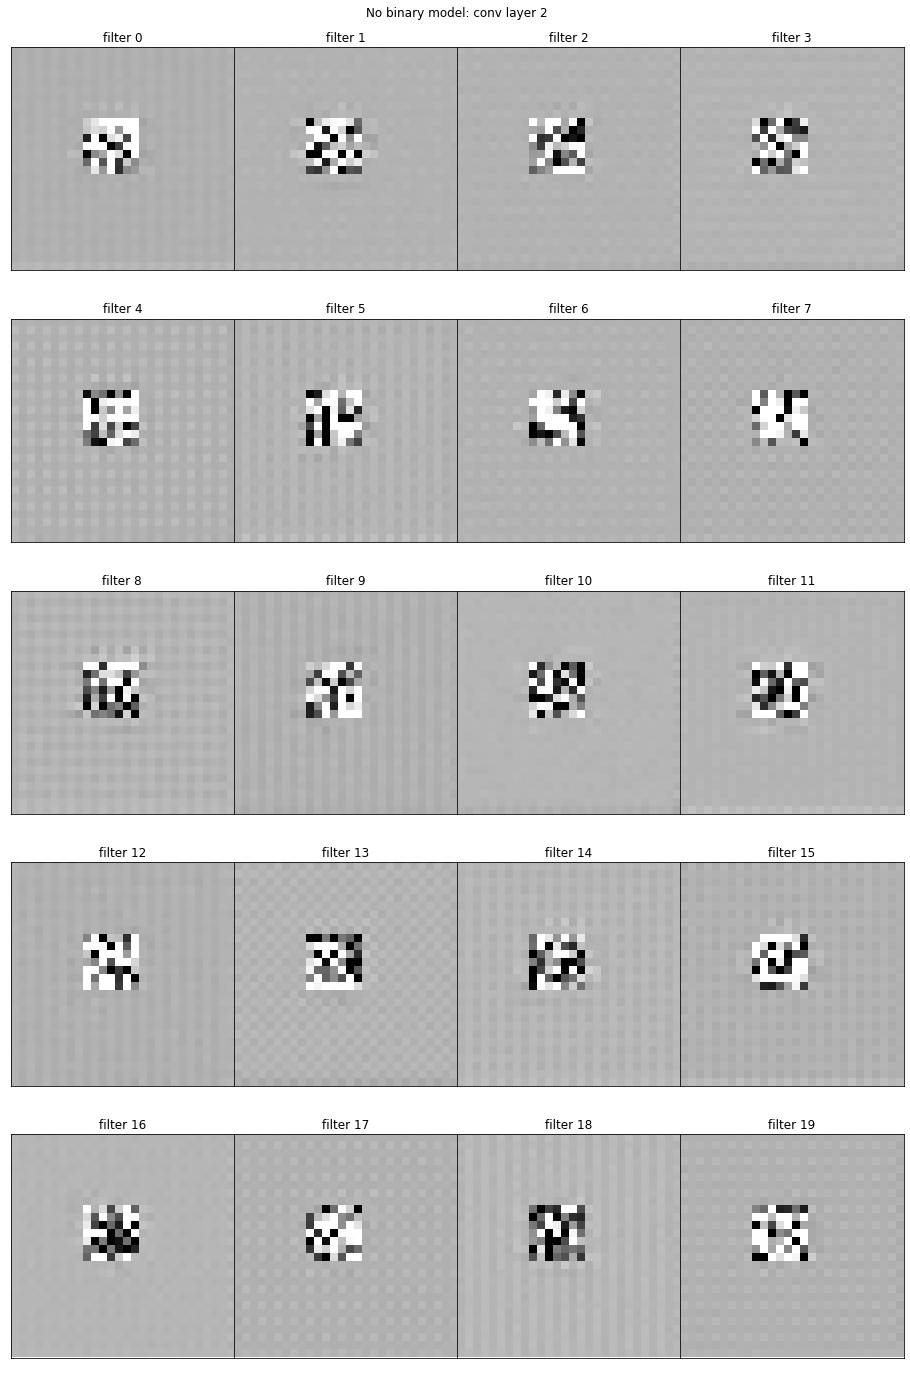

In [0]:
g_ascent_no_binary.visualize(conv1_no_binary, conv1_filters_no_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, title='No binary model: conv layer 1')
g_ascent_no_binary.visualize(conv2_no_binary, conv2_filters_no_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, title='No binary model: conv layer 2')

### Binary model:

In [0]:
g_ascent_binary = GradientAscent(model_binary, img_size=28)
g_ascent_binary.use_gpu = True

In [0]:
conv1_binary = model_binary.layer1
conv1_filters_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7

conv2_binary = model_binary.layer2
conv2_filters_binary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
mean_gradient_layer2 = False
ind_x_layer2 = 3
ind_y_layer2 = 3

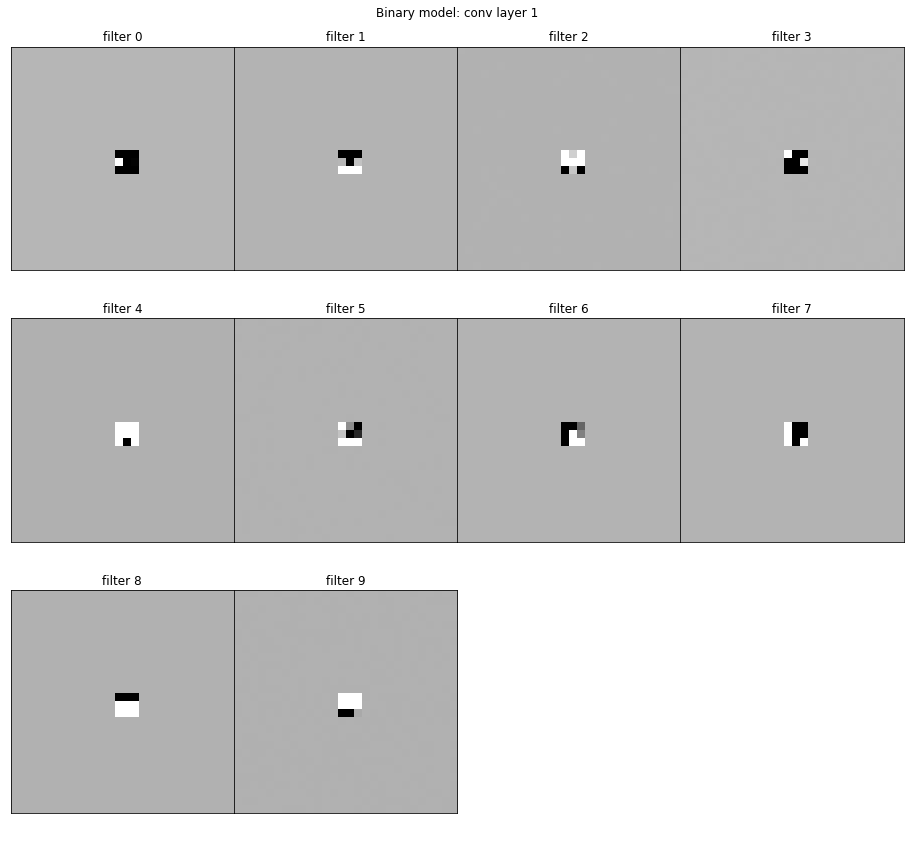

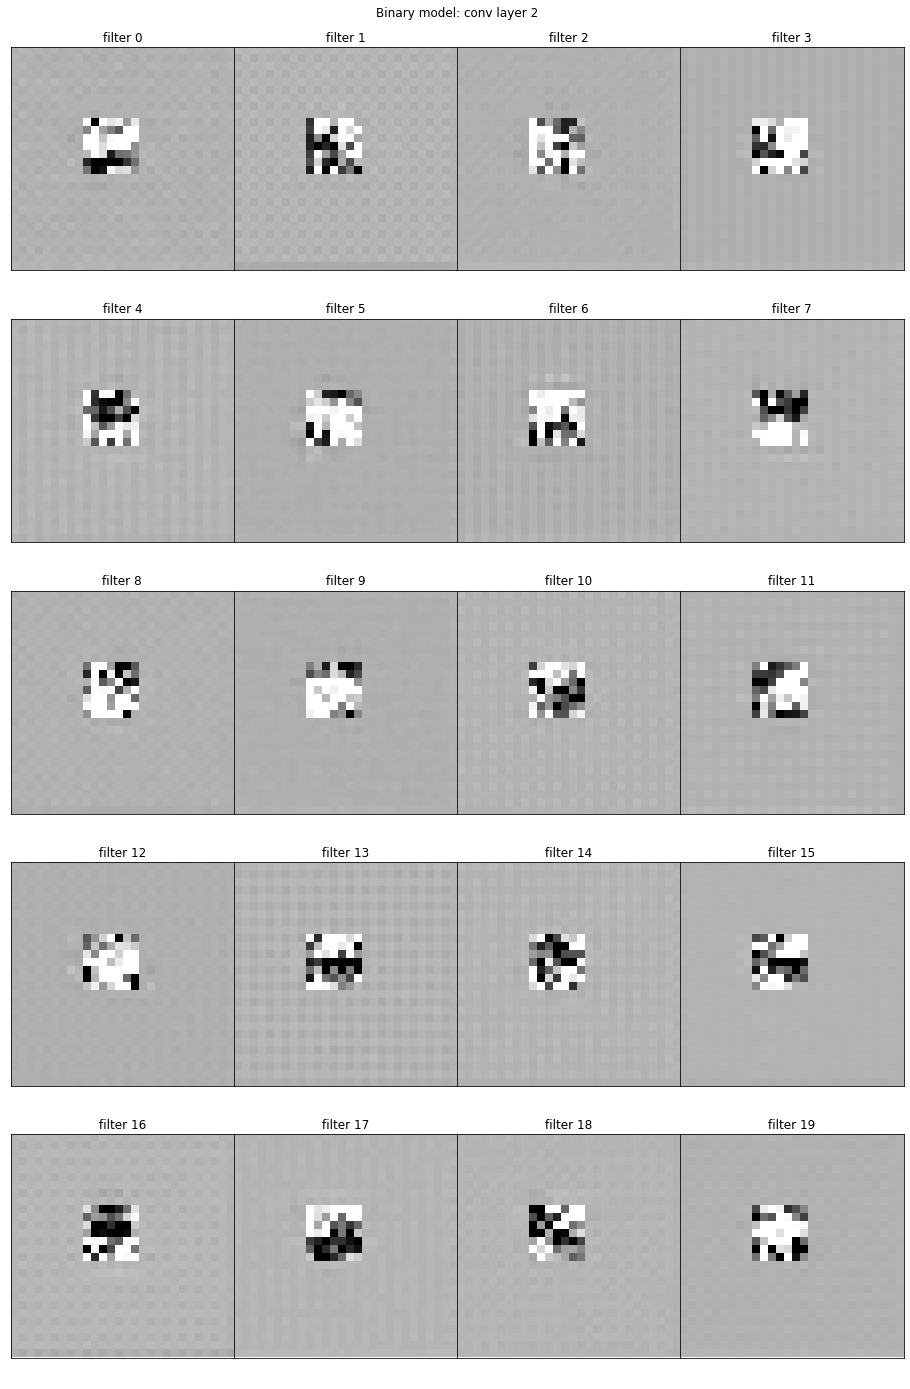

In [0]:
g_ascent_binary.visualize(conv1_binary, conv1_filters_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, title='Binary model: conv layer 1')
g_ascent_binary.visualize(conv2_binary, conv2_filters_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, title='Binary model: conv layer 2')

## Visuazation regions that maximizes a specific layer and filter:

### Run:

#### Modules:

In [0]:
def get_all_regions_max(loader, activations, len_img_h, len_img_w):

    dataiter = iter(loader)
    images, _ = dataiter.next()
    print('nb images: {}'.format(len(images)))

    print('begin extraction regions')
    region_final = {}
    activation_final = {}
    
    filter_layer2 = get_filter_layer2()
    # filter_layer3 = get_filter_layer3()
    # filter_layer4 = get_filter_layer4()

    for name, fm in activations.items():
      # for each image of fm 
      if name=='layer1':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 3, 3))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      if name=='layer2':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 7, 7))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      if name=='layer3':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 15, 15))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      if name=='layer4':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 31, 31))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      for j in range(fm.shape[0]):
          print('treating image n {}/{}, for layer: {}'.format(j, fm.shape[0], name))
          
          im = images[j].unsqueeze(0).numpy().squeeze()  # image i of batch batch: numpy array: (28,28)
          if name=='layer1':
            regions_im_j = np.zeros((fm.shape[1], 3, 3))  # initialise empty list of regions for batch batch
            activation_im_j = np.zeros((fm.shape[1]))
          if name=='layer2':
            regions_im_j = np.zeros((fm.shape[1], 7, 7))
            regions_im_j = (regions_im_j*filter_layer2)/4
            activation_im_j = np.zeros((fm.shape[1]))
          if name=='layer3':
            regions_im_j = np.zeros((fm.shape[1], 15, 15))
            regions_im_j = (regions_im_j*filter_layer3)/4
            activation_im_j = np.zeros((fm.shape[1]))
          if name=='layer4':
            regions_im_j = np.zeros((fm.shape[1], 31, 31))
            regions_im_j = (regions_im_j*filter_layer4)/4
            activation_im_j = np.zeros((fm.shape[1]))
          for i in range(fm.shape[1]):  # for all fm in image j
            act_max = max(fm[j][i].min(), fm[j][i].max(), key=abs)  # get max activation value in fm j
            ind_x = int((np.where(fm[j][i]==act_max)[0])[0])  # get index (x,y) of act_max
            ind_y = int((np.where(fm[j][i]==act_max)[1])[0])

            if name=='layer1':
              region = get_region_layer1(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w)
            if name=='layer2':
              region = get_region_layer2(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w)
            if name=='layer3':
              region = get_region_layer3(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w)
            if name=='layer4':
              region = get_region_layer4(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w)
            
            regions_im_j[i] = region
            activation_im_j[i] = act_max.detach().numpy()
          regions_layer[j] = regions_im_j
          activation_layer[j] = activation_im_j
      region_final[name] = regions_layer
      activation_final[name] = activation_layer

    return region_final, activation_final

#### Extract and save regions and activations:

##### No binary model:

In [0]:
activations_no_binary = collections.defaultdict(list)

In [0]:
def save_activation_no_binary(name, mod, inp, out):
    activations_no_binary[name].append(out.cpu())
     

In [0]:
for name, m in model_no_binary.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_no_binary, name))

for batch in train_loader:
  out = model_no_binary(batch[0])
  break  # for only one batch

activations_no_binary = {name: torch.cat(outputs, 0) for name, outputs in activations_no_binary.items()}

for k,v in activations_no_binary.items():
      print (k, v.size())

layer1 torch.Size([10000, 10, 14, 14])
layer2 torch.Size([10000, 20, 7, 7])


In [0]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 28
len_img_h = 28
loader = train_loader

region_final, activation_final = get_all_regions_max(loader, activations_no_binary, len_img_h, len_img_w)

region_layer1_no_binary = region_final['layer1']
region_layer2_no_binary = region_final['layer2']
activation_layer1_no_binary = activation_final['layer1']
activation_layer2_no_binary = activation_final['layer2']

print(region_layer1_no_binary.shape)
print(region_layer2_no_binary.shape)
print(activation_layer1_no_binary.shape)
print(activation_layer2_no_binary.shape)

Streaming output truncated to the last 5000 lines.
treating image n 5005/10000, for layer: layer2
treating image n 5006/10000, for layer: layer2
treating image n 5007/10000, for layer: layer2
treating image n 5008/10000, for layer: layer2
treating image n 5009/10000, for layer: layer2
treating image n 5010/10000, for layer: layer2
treating image n 5011/10000, for layer: layer2
treating image n 5012/10000, for layer: layer2
treating image n 5013/10000, for layer: layer2
treating image n 5014/10000, for layer: layer2
treating image n 5015/10000, for layer: layer2
treating image n 5016/10000, for layer: layer2
treating image n 5017/10000, for layer: layer2
treating image n 5018/10000, for layer: layer2
treating image n 5019/10000, for layer: layer2
treating image n 5020/10000, for layer: layer2
treating image n 5021/10000, for layer: layer2
treating image n 5022/10000, for layer: layer2
treating image n 5023/10000, for layer: layer2
treating image n 5024/10000, for layer: layer2
treating 

In [0]:
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer1.npy', region_layer1_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer2.npy', region_layer2_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer1.npy', activation_layer1_no_binary)
np.save('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer2.npy', activation_layer2_no_binary)

##### Binary model:

In [0]:
activations_binary = collections.defaultdict(list)

In [0]:
def save_activation_binary(name, mod, inp, out):
    activations_binary[name].append(out.cpu())

In [0]:
for name, m in model_binary.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_binary, name))

for batch in train_loader:
  out = model_binary(batch[0])
  break  # for only one batch

activations_binary = {name: torch.cat(outputs, 0) for name, outputs in activations_binary.items()}

for k,v in activations_binary.items():
      print (k, v.size())

layer1 torch.Size([10000, 10, 14, 14])
layer2 torch.Size([10000, 20, 7, 7])


In [0]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 28
len_img_h = 28
loader = train_loader

region_final, activation_final = get_all_regions_max(loader, activations_binary, len_img_h, len_img_w)

region_layer1_binary = region_final['layer1']
region_layer2_binary = region_final['layer2']
activation_layer1_binary = activation_final['layer1']
activation_layer2_binary = activation_final['layer2']

print(region_layer1_binary.shape)
print(region_layer2_binary.shape)
print(activation_layer1_binary.shape)
print(activation_layer2_binary.shape)

Streaming output truncated to the last 5000 lines.
treating image n 5005/10000, for layer: layer2
treating image n 5006/10000, for layer: layer2
treating image n 5007/10000, for layer: layer2
treating image n 5008/10000, for layer: layer2
treating image n 5009/10000, for layer: layer2
treating image n 5010/10000, for layer: layer2
treating image n 5011/10000, for layer: layer2
treating image n 5012/10000, for layer: layer2
treating image n 5013/10000, for layer: layer2
treating image n 5014/10000, for layer: layer2
treating image n 5015/10000, for layer: layer2
treating image n 5016/10000, for layer: layer2
treating image n 5017/10000, for layer: layer2
treating image n 5018/10000, for layer: layer2
treating image n 5019/10000, for layer: layer2
treating image n 5020/10000, for layer: layer2
treating image n 5021/10000, for layer: layer2
treating image n 5022/10000, for layer: layer2
treating image n 5023/10000, for layer: layer2
treating image n 5024/10000, for layer: layer2
treating 

In [0]:
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer1.npy', region_layer1_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer2.npy', region_layer2_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer1.npy', activation_layer1_binary)
np.save('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer2.npy', activation_layer2_binary)

### Visualize max regions:

#### Load regions and activations:

In [0]:
region_layer1_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer1.npy', allow_pickle=True)
region_layer2_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_regions_max_layer2.npy', allow_pickle=True)
activation_layer1_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_no_binary = np.load('results/MNIST_results/MNIST_regions/No_binary_MNIST_activations_max_layer2.npy', allow_pickle=True)

In [0]:
region_layer1_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer1.npy', allow_pickle=True)
region_layer2_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_regions_max_layer2.npy', allow_pickle=True)
activation_layer1_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_binary = np.load('results/MNIST_results/MNIST_regions/Binary_MNIST_activations_max_layer2.npy', allow_pickle=True)

#### Viz:

##### No binary model layer1:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Consider 10% image regions = 1000 images
mean image:
mean regions of 1000 regions more=True or worst=False active for filter number: 0 :


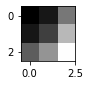

mean regions of 1000 regions more=True or worst=False active for filter number: 1 :


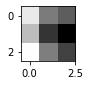

mean regions of 1000 regions more=True or worst=False active for filter number: 2 :


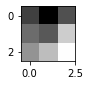

mean regions of 1000 regions more=True or worst=False active for filter number: 3 :


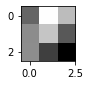

mean regions of 1000 regions more=True or worst=False active for filter number: 4 :


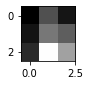

mean regions of 1000 regions more=True or worst=False active for filter number: 5 :


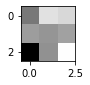

mean regions of 1000 regions more=True or worst=False active for filter number: 6 :


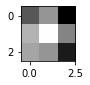

mean regions of 1000 regions more=True or worst=False active for filter number: 7 :


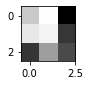

mean regions of 1000 regions more=True or worst=False active for filter number: 8 :


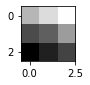

mean regions of 1000 regions more=True or worst=False active for filter number: 9 :


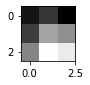

grid image
grid regions of 1000 regions more=True or worst=False active for filter number: 0 :


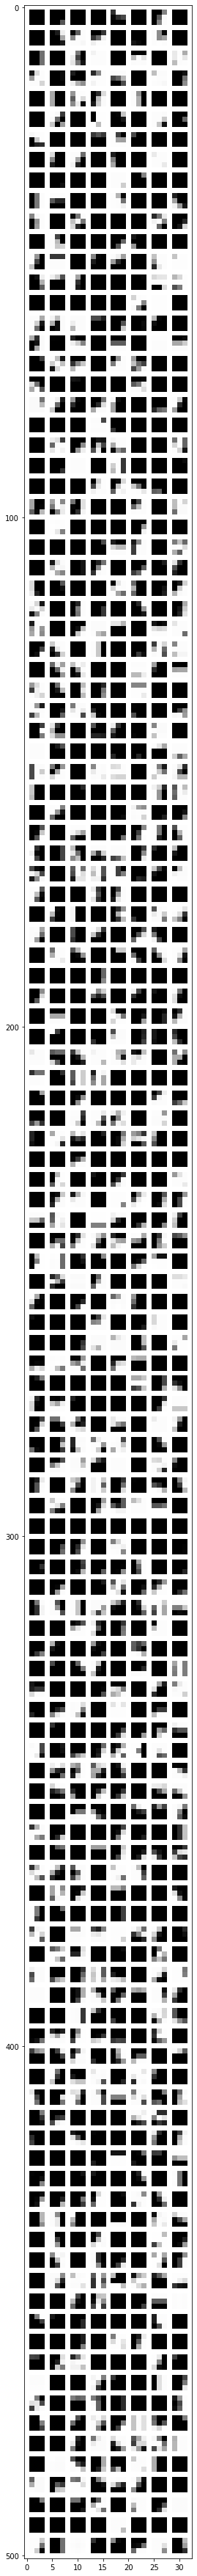

grid regions of 1000 regions more=True or worst=False active for filter number: 1 :


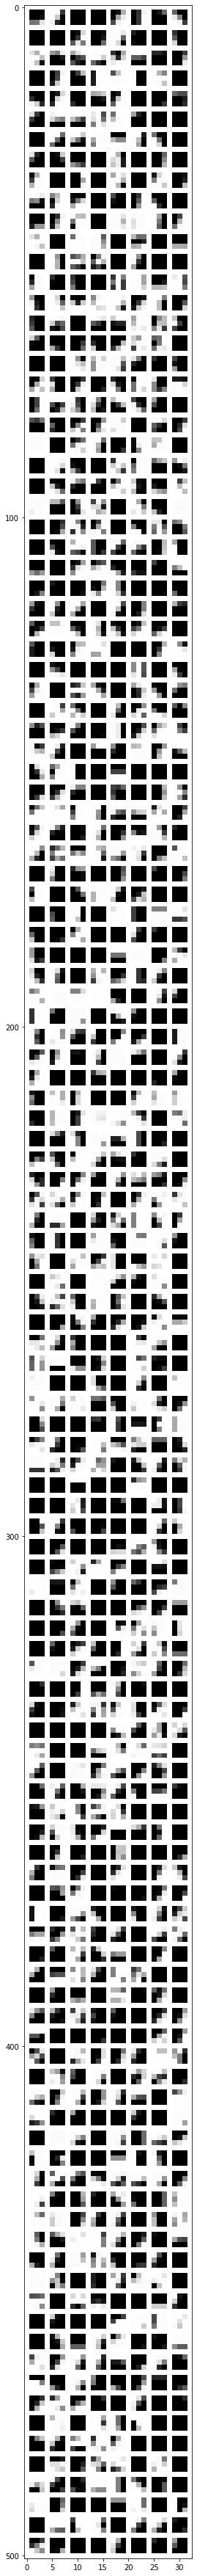

grid regions of 1000 regions more=True or worst=False active for filter number: 2 :


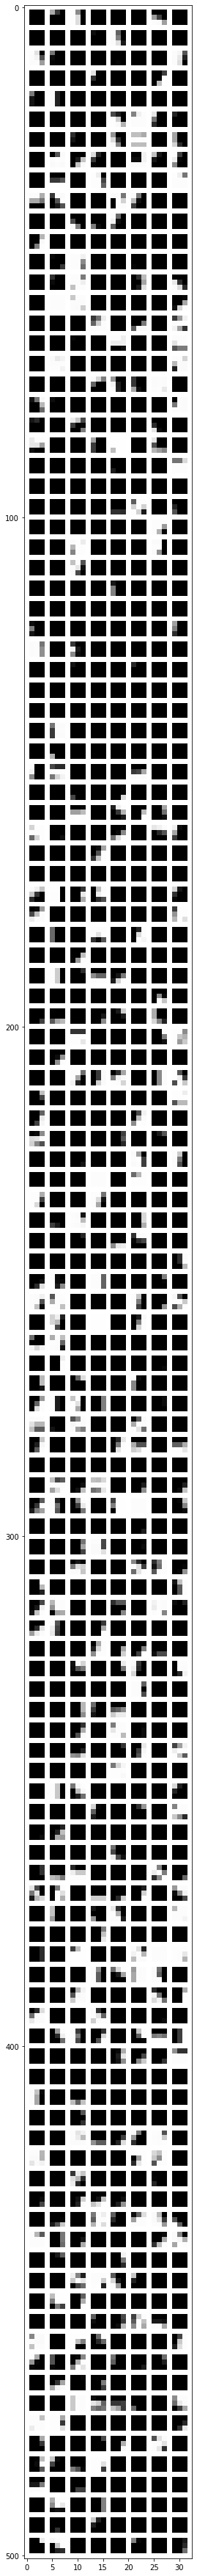

grid regions of 1000 regions more=True or worst=False active for filter number: 3 :


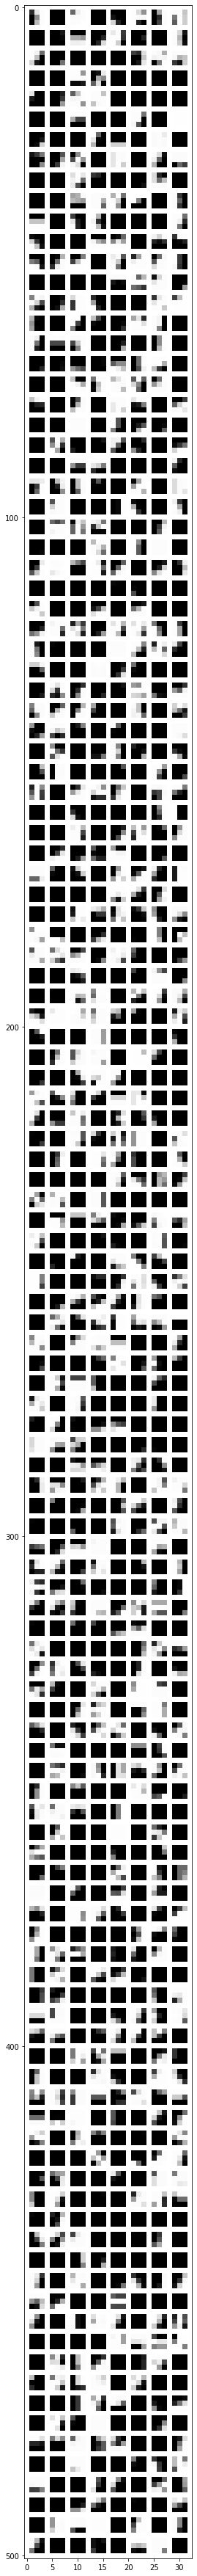

grid regions of 1000 regions more=True or worst=False active for filter number: 4 :


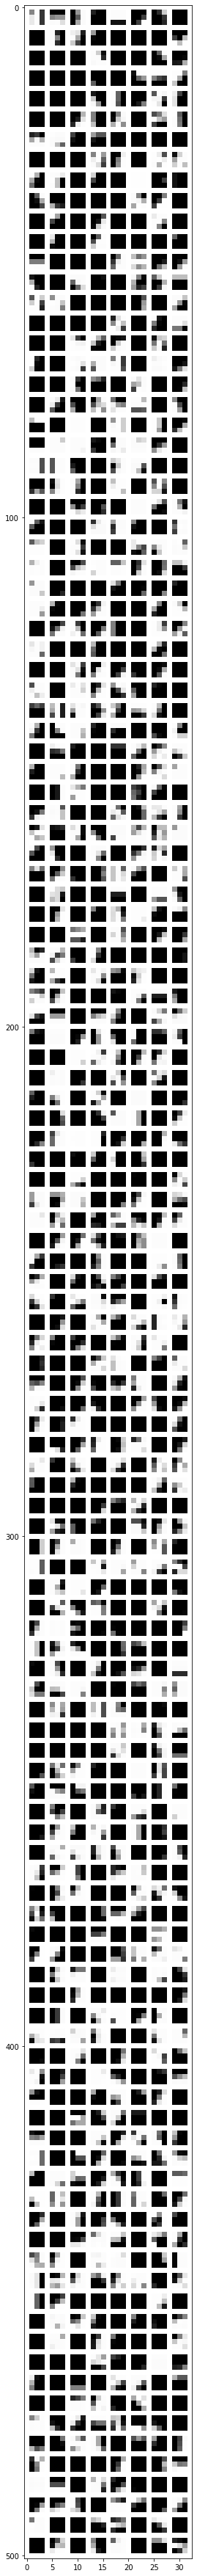

grid regions of 1000 regions more=True or worst=False active for filter number: 5 :


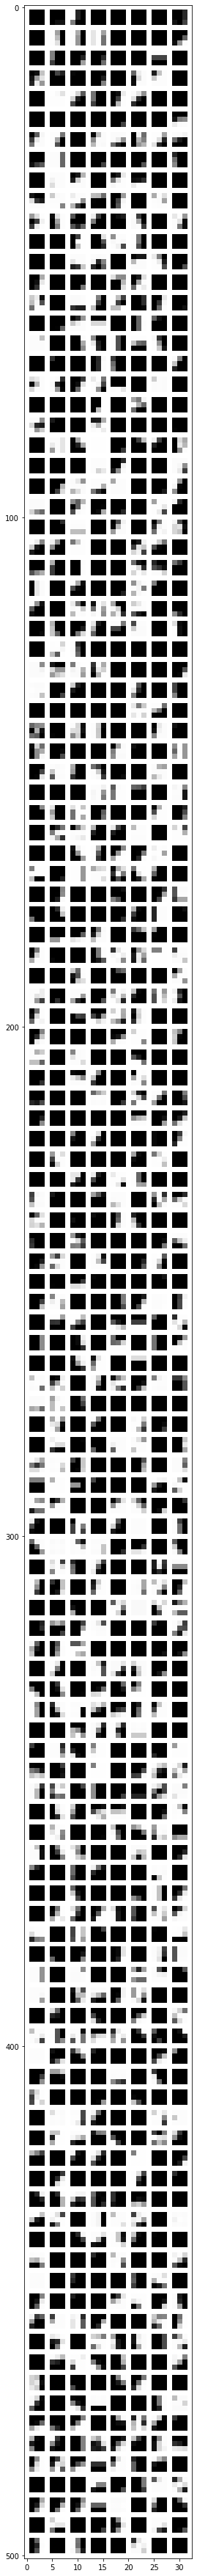

grid regions of 1000 regions more=True or worst=False active for filter number: 6 :


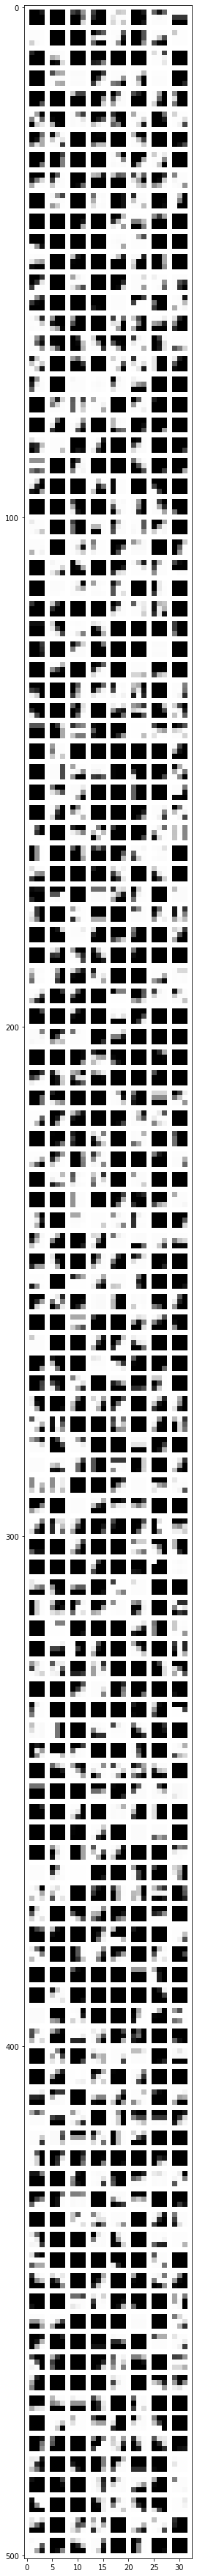

grid regions of 1000 regions more=True or worst=False active for filter number: 7 :


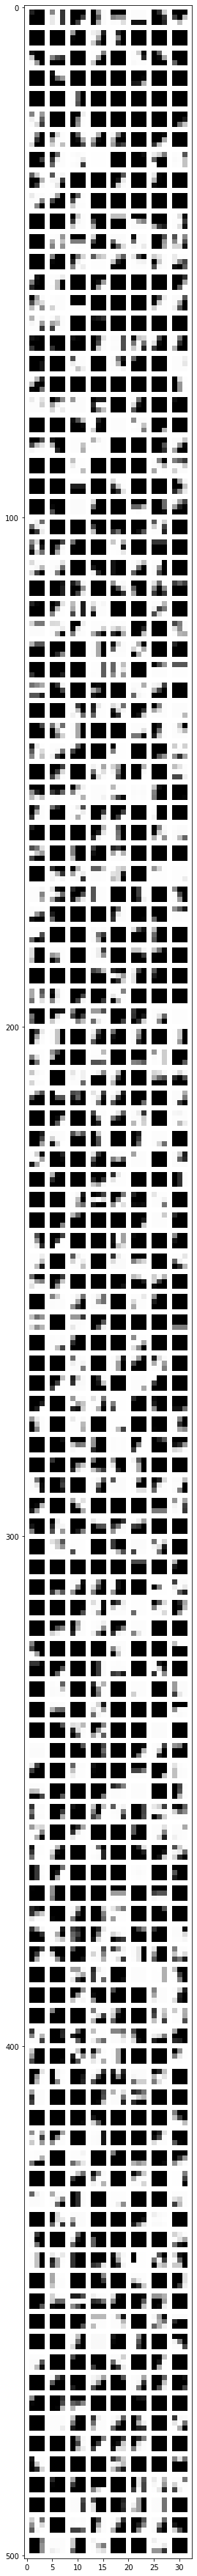

grid regions of 1000 regions more=True or worst=False active for filter number: 8 :


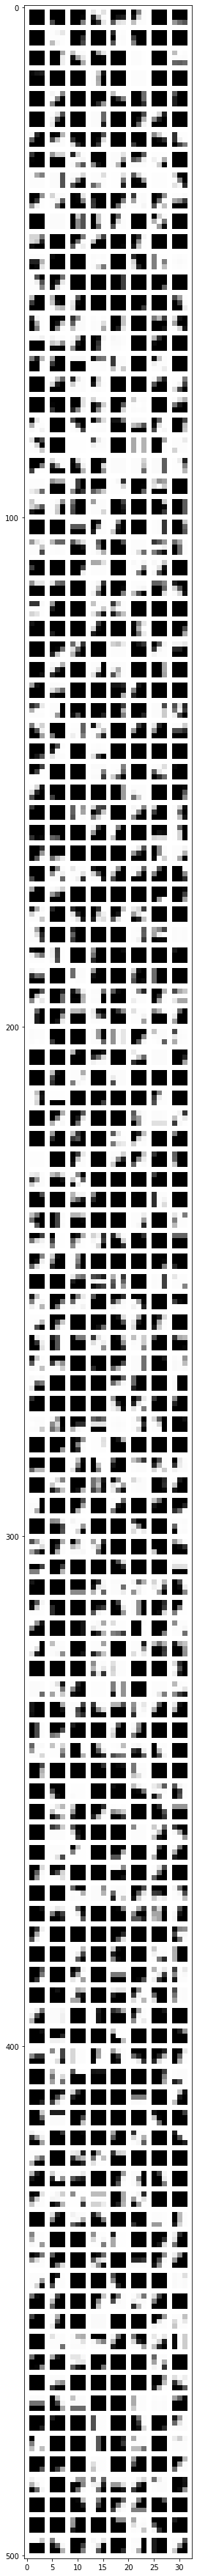

grid regions of 1000 regions more=True or worst=False active for filter number: 9 :


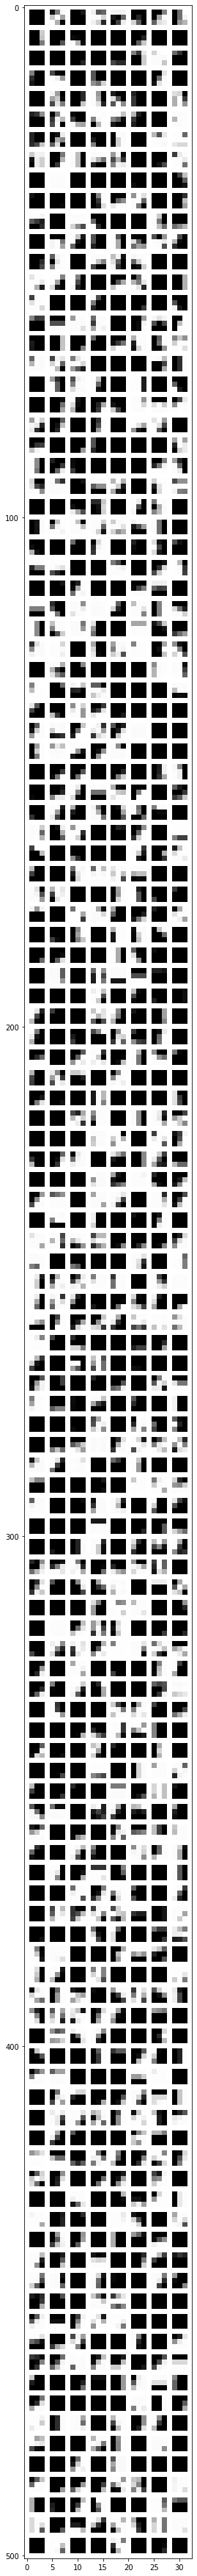

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer1_no_binary
activations = activation_layer1_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

##### No binary model layer2:

In [0]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer2_no_binary
activations = activation_layer2_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2)

Output hidden; open in https://colab.research.google.com to view.

##### Binary model layer1:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Consider 10% image regions = 1000 images
mean image:
mean regions of 1000 regions more=True or worst=False active for filter number: 0 :


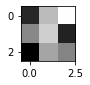

mean regions of 1000 regions more=True or worst=False active for filter number: 1 :


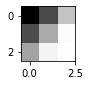

mean regions of 1000 regions more=True or worst=False active for filter number: 2 :


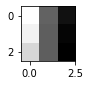

mean regions of 1000 regions more=True or worst=False active for filter number: 3 :


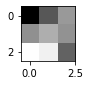

mean regions of 1000 regions more=True or worst=False active for filter number: 4 :


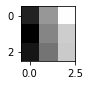

mean regions of 1000 regions more=True or worst=False active for filter number: 5 :


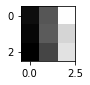

mean regions of 1000 regions more=True or worst=False active for filter number: 6 :


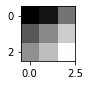

mean regions of 1000 regions more=True or worst=False active for filter number: 7 :


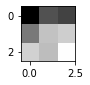

mean regions of 1000 regions more=True or worst=False active for filter number: 8 :


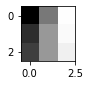

mean regions of 1000 regions more=True or worst=False active for filter number: 9 :


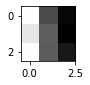

grid image
grid regions of 1000 regions more=True or worst=False active for filter number: 0 :


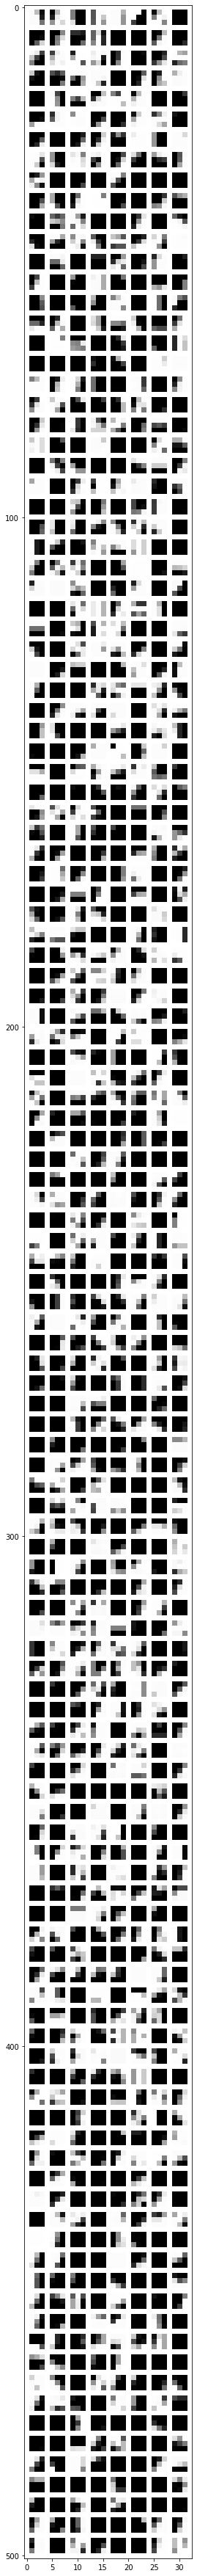

grid regions of 1000 regions more=True or worst=False active for filter number: 1 :


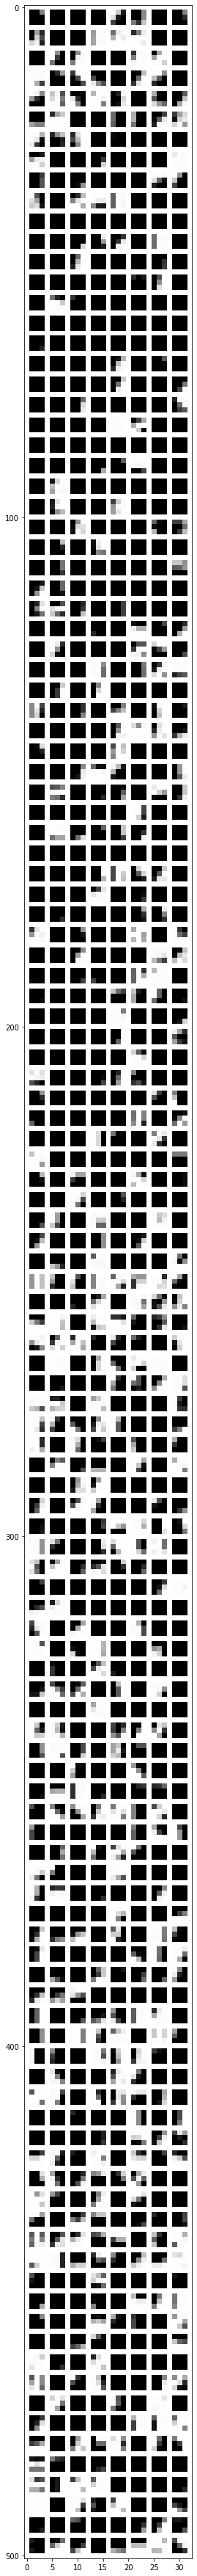

grid regions of 1000 regions more=True or worst=False active for filter number: 2 :


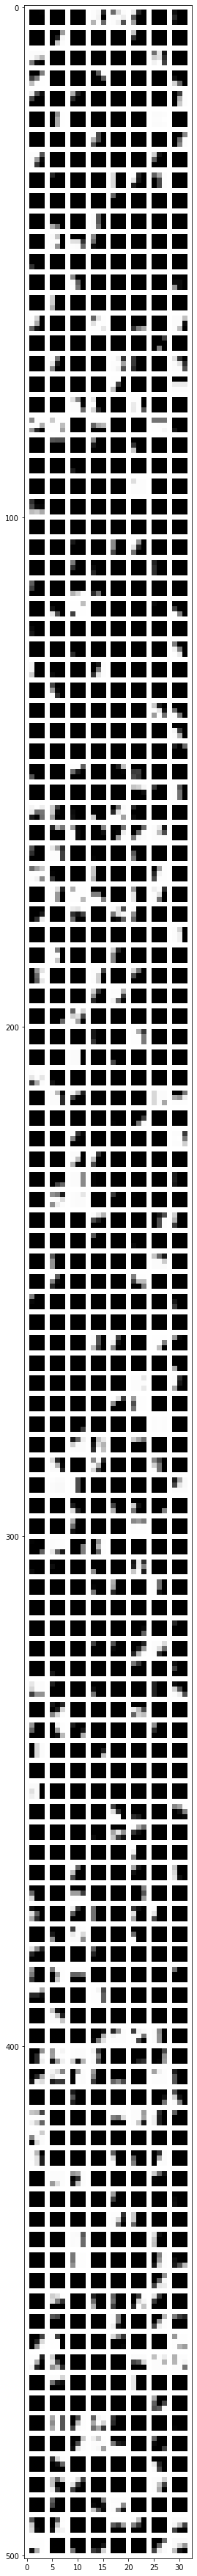

grid regions of 1000 regions more=True or worst=False active for filter number: 3 :


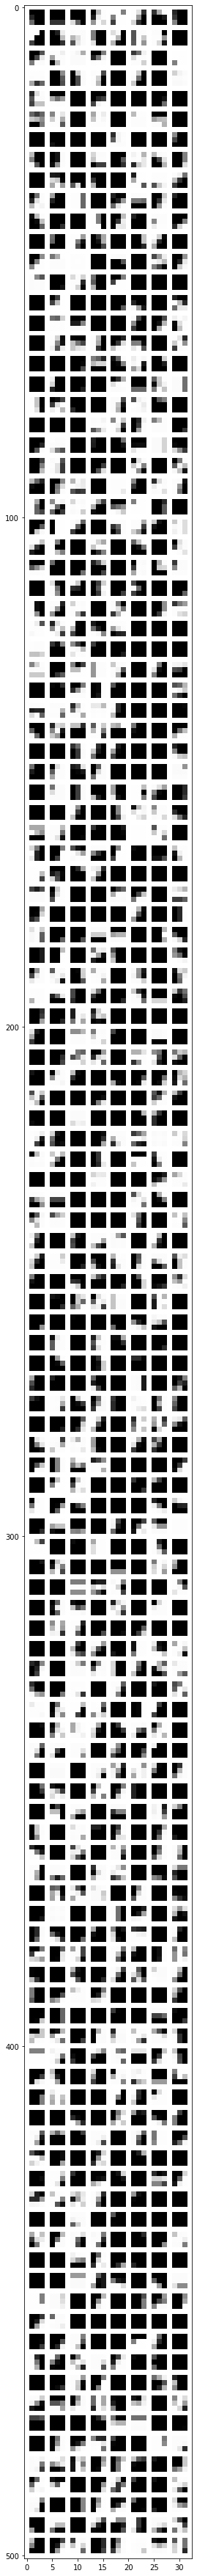

grid regions of 1000 regions more=True or worst=False active for filter number: 4 :


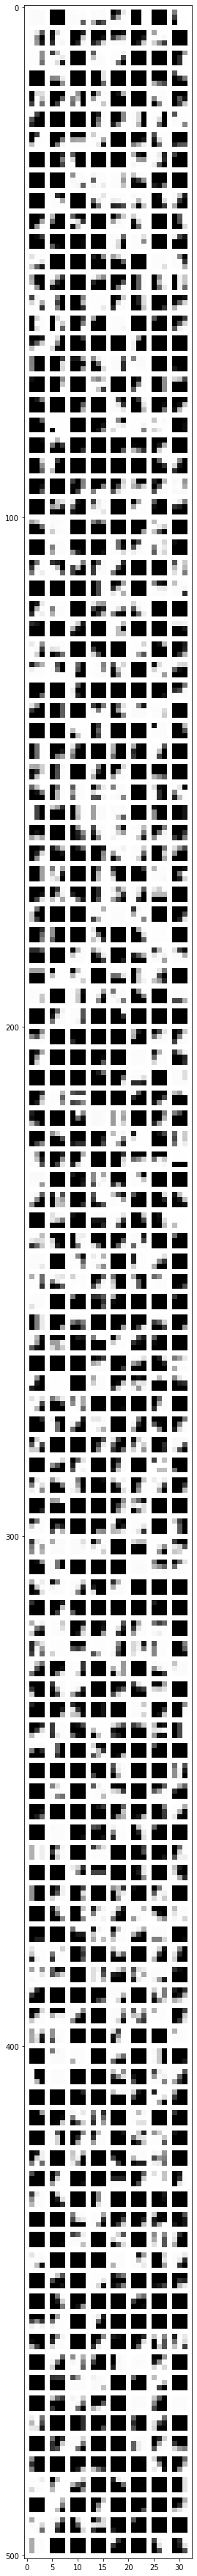

grid regions of 1000 regions more=True or worst=False active for filter number: 5 :


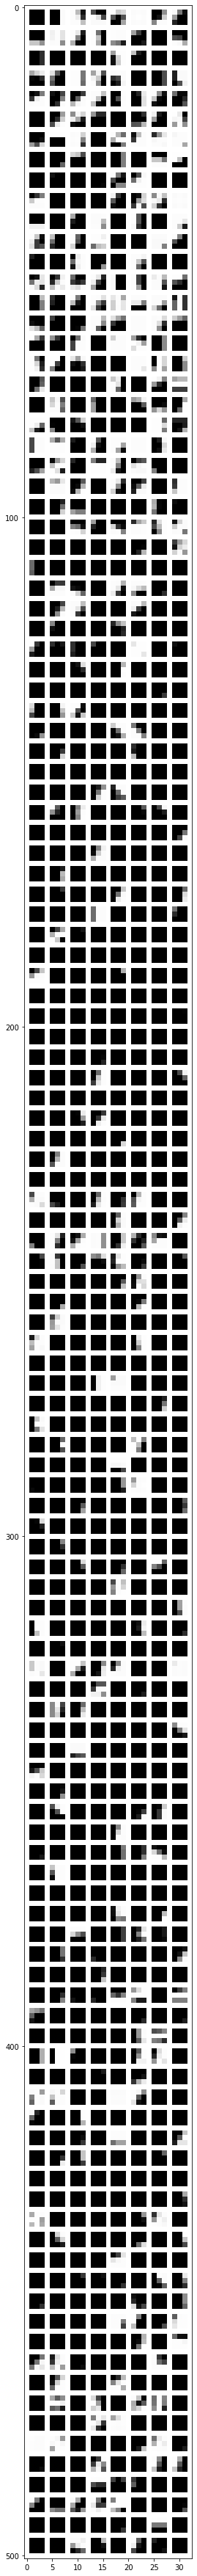

grid regions of 1000 regions more=True or worst=False active for filter number: 6 :


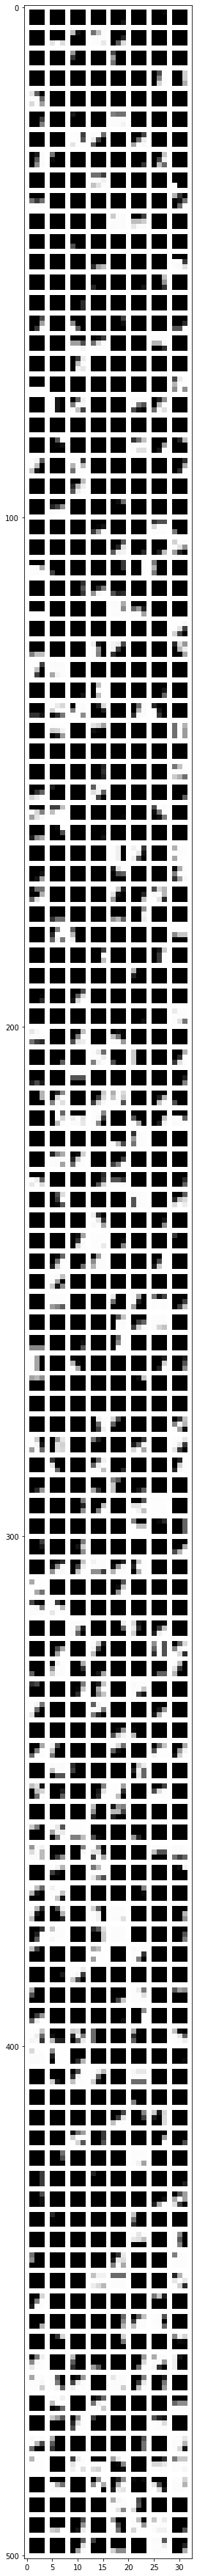

grid regions of 1000 regions more=True or worst=False active for filter number: 7 :


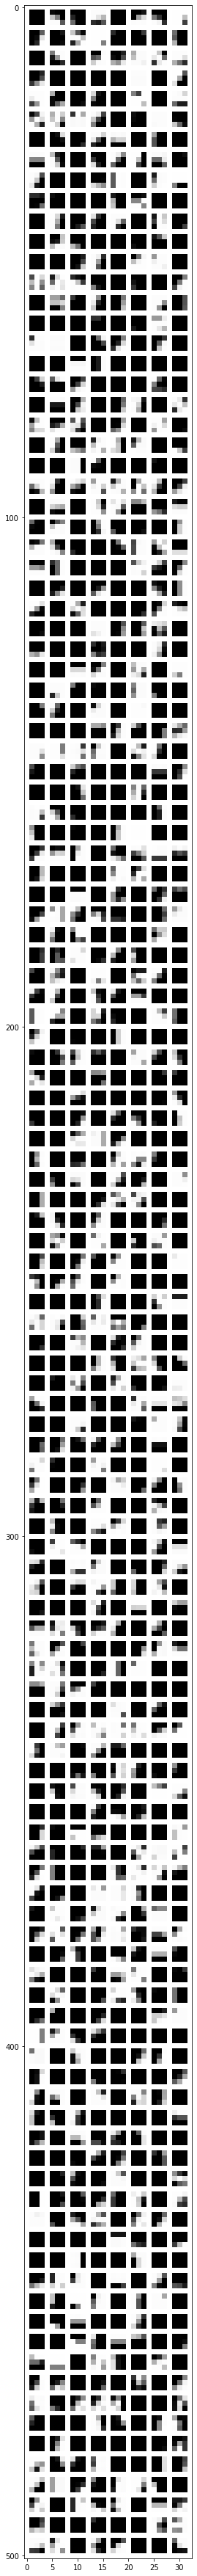

grid regions of 1000 regions more=True or worst=False active for filter number: 8 :


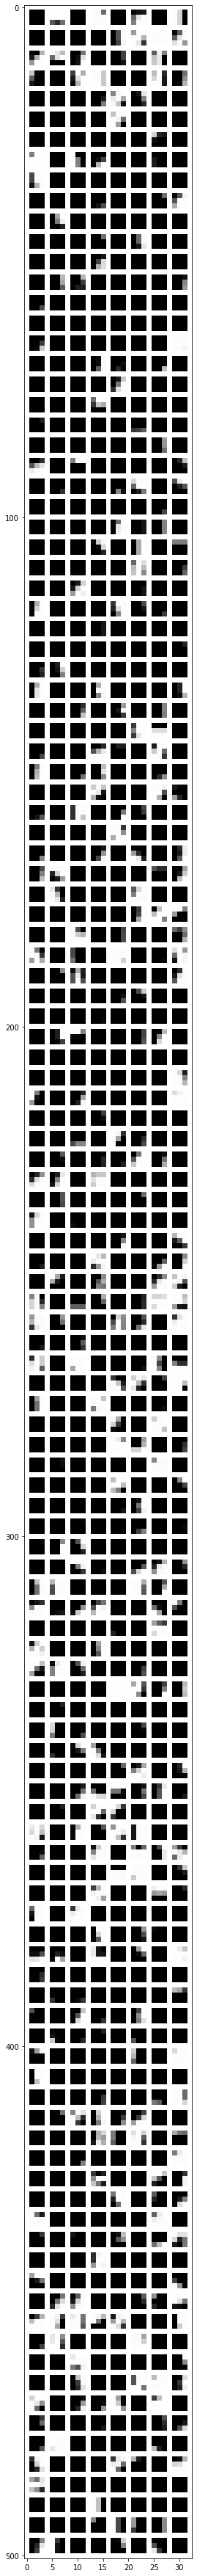

grid regions of 1000 regions more=True or worst=False active for filter number: 9 :


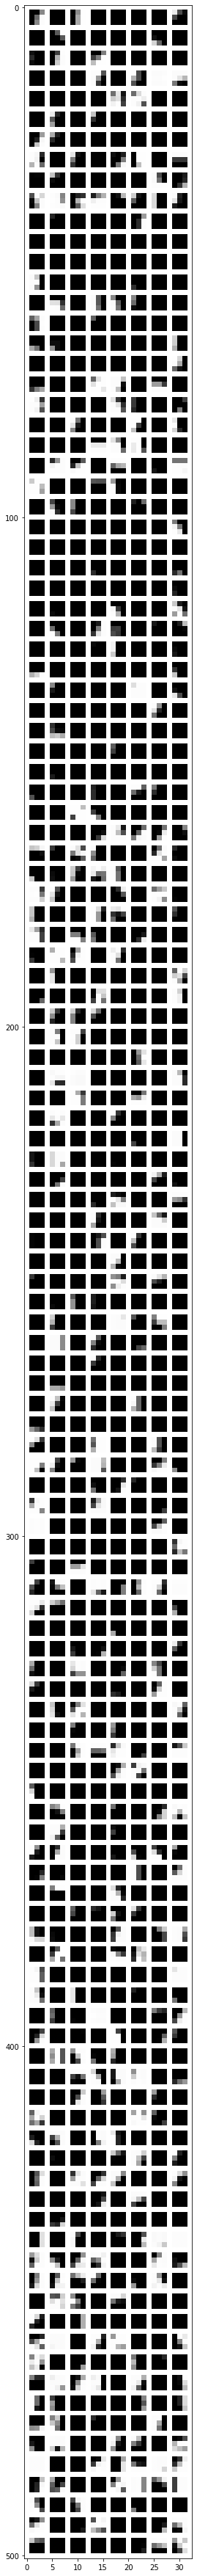

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer1_binary
activations = activation_layer1_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

##### Binary model layer2:

In [0]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer2_binary
activations = activation_layer2_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2)

Output hidden; open in https://colab.research.google.com to view.

## Viz all:

### No binary model:

Visualization filters learned for layer: layer1


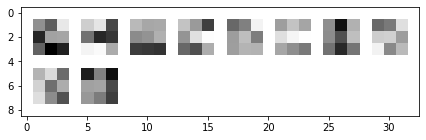

Visualization filters learned for layer: layer2


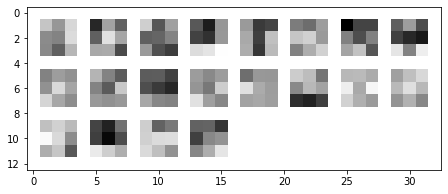

In [0]:
viz_filters(model_no_binary)

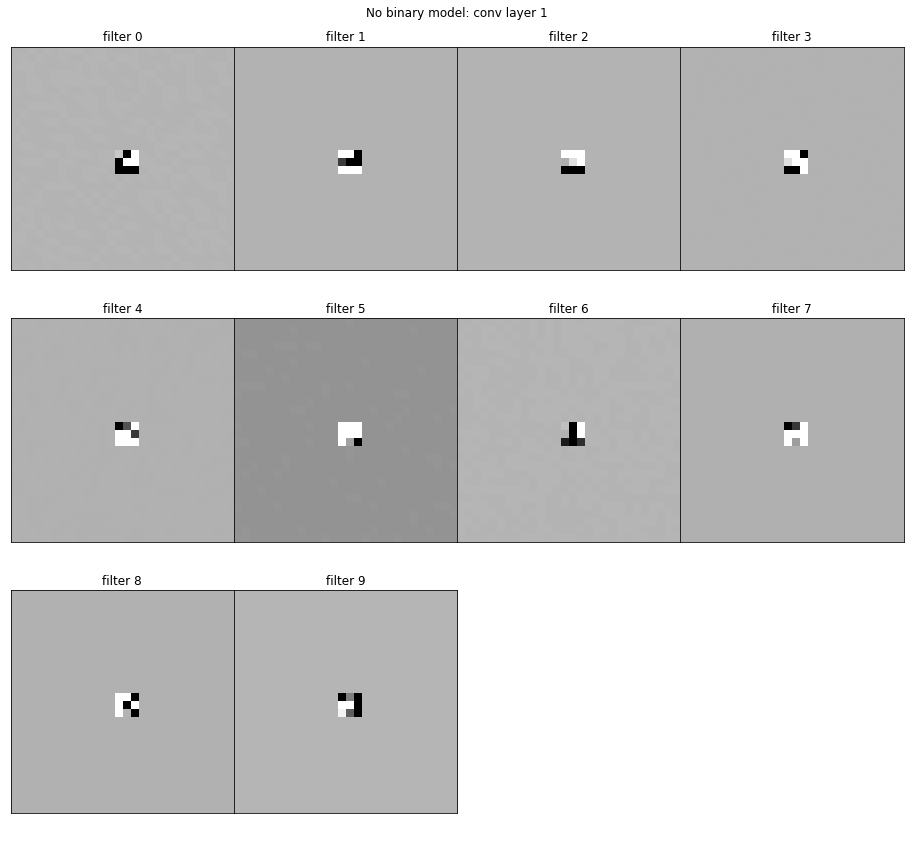

In [0]:
g_ascent_no_binary = GradientAscent(model_no_binary, img_size=28)
g_ascent_no_binary.use_gpu = True

conv1_no_binary = model_no_binary.layer1
conv1_filters_no_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7


g_ascent_no_binary.visualize(conv1_no_binary, conv1_filters_no_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, title='No binary model: conv layer 1')

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Consider 100% image regions = 10000 images
mean image:
mean regions of 10000 regions more=True or worst=False active for filter number: 0 :


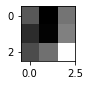

mean regions of 10000 regions more=True or worst=False active for filter number: 1 :


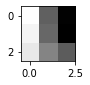

mean regions of 10000 regions more=True or worst=False active for filter number: 2 :


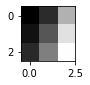

mean regions of 10000 regions more=True or worst=False active for filter number: 3 :


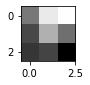

mean regions of 10000 regions more=True or worst=False active for filter number: 4 :


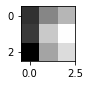

mean regions of 10000 regions more=True or worst=False active for filter number: 5 :


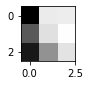

mean regions of 10000 regions more=True or worst=False active for filter number: 6 :


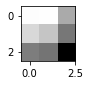

mean regions of 10000 regions more=True or worst=False active for filter number: 7 :


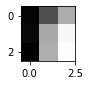

mean regions of 10000 regions more=True or worst=False active for filter number: 8 :


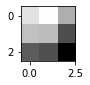

mean regions of 10000 regions more=True or worst=False active for filter number: 9 :


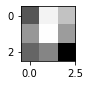

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = False
percentage = 100

# regions and activation of interest
regions = region_layer1_no_binary
activations = activation_layer1_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

### Binary model:

In [0]:
viz_filters(model_binary)

In [0]:
g_ascent_binary = GradientAscent(model_binary, img_size=28)
g_ascent_binary.use_gpu = True

conv1_binary = model_binary.layer1
conv1_filters_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7


g_ascent_binary.visualize(conv1_binary, conv1_filters_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, title='Binary model: conv layer 1')

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = False
percentage = 100

# regions and activation of interest
regions = region_layer1_binary
activations = activation_layer1_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)